In [ ]:
#mount drive to colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#installing and importing all the required packages
import numpy as np
import pandas as pd
import sklearn as ski
import seaborn as sns
import matplotlib as map
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, HuberRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile


In [ ]:
#loading the dataset into dataframe from the drive path
path = "/content/drive/MyDrive/IST 707 Applied Machine Learning/Dataset/players.csv"
df = pd.read_csv(path)

In [ ]:
# size of the dataframe
df.shape

(19002, 56)

In [ ]:
#descriptive statistics for the above Dataframe
df.describe()

int_player_id    int_height    int_weight  int_overall_rating  \
count   19002.000000  19002.000000  19002.000000        19002.000000   
mean     9501.500000    181.225660     75.046311           65.754868   
std      5485.549243      6.847472      7.078378            6.948835   
min         1.000000    155.000000     50.000000           47.000000   
25%      4751.250000    176.000000     70.000000           61.000000   
50%      9501.500000    181.000000     75.000000           66.000000   
75%     14251.750000    186.000000     80.000000           70.000000   
max     19002.000000    206.000000    110.000000           93.000000   

       int_potential_rating  int_best_overall_rating     int_value  \
count          19002.000000             19002.000000  1.900200e+04   
mean              71.148932                66.784286  2.891449e+06   
std                6.115352                 6.733926  7.733189e+06   
min               48.000000                48.000000  0.000000e+00   
25%               67.000000                62.000000  4.750000e+05   
50%               71.000000                67.000000  9.500000e+05   
75%               75.000000                71.000000  2.000000e+06   
max               95.000000                93.000000  1.855000e+08   

            int_wage   int_team_id  int_crossing  ...  int_strength  \
count   19002.000000  18767.000000  19002.000000  ...  19002.000000   
mean     9113.167035    332.655086     49.690454  ...     64.829386   
std     19735.324238    196.415422     18.141514  ...     12.469760   
min         0.000000      1.000000      6.000000  ...     16.000000   
25%      1000.000000    162.000000     38.000000  ...     57.000000   
50%      3000.000000    330.000000     54.000000  ...     66.000000   
75%      8000.000000    502.000000     63.000000  ...     74.000000   
max    560000.000000    681.000000     94.000000  ...     97.000000   

       int_long_shots  int_weak_foot  int_skill_moves  \
count    19002.000000   19002.000000     19002.000000   
mean        46.812967       2.942217         2.365540   
std         19.307572       0.669568         0.766687   
min          4.000000       1.000000         1.000000   
25%         32.000000       3.000000         2.000000   
50%         51.000000       3.000000         2.000000   
75%         62.000000       3.000000         3.000000   
max         94.000000       5.000000         5.000000   

       int_international_reputations  int_dribbling     int_curve  \
count                   19002.000000   19002.000000  19002.000000   
mean                        1.090569      55.607462     47.271603   
std                         0.359019      18.786894     18.217325   
min                         1.000000       5.000000      4.000000   
25%                         1.000000      49.000000     35.000000   
50%                         1.000000      61.000000     49.000000   
75%                         1.000000      68.000000     61.000000   
max                         5.000000      96.000000     94.000000   

       int_fk_accuracy  int_long_passing  int_ball_control  
count     19002.000000      19002.000000      19002.000000  
mean         42.394432         52.779971         58.552416  
std          17.240399         15.172601         16.580120  
min           5.000000          5.000000          5.000000  
25%          31.000000         43.000000         54.000000  
50%          41.000000         56.000000         63.000000  
75%          55.000000         64.000000         69.000000  
max          94.000000         93.000000         96.000000  

[8 rows x 46 columns]

In [ ]:
#Summary of the Dataframe's metadata, including the number of non-null values, data type, memory usage, and column names.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   int_player_id                  19002 non-null  int64  
 1   str_player_name                19002 non-null  object 
 2   str_positions                  19002 non-null  object 
 3   dt_date_of_birth               19002 non-null  object 
 4   int_height                     19002 non-null  int64  
 5   int_weight                     19002 non-null  int64  
 6   int_overall_rating             19002 non-null  int64  
 7   int_potential_rating           19002 non-null  int64  
 8   str_best_position              19002 non-null  object 
 9   int_best_overall_rating        19002 non-null  int64  
 10  int_value                      19002 non-null  int64  
 11  int_wage                       19002 non-null  int64  
 12  int_team_id                    18767 non-null 

In [ ]:
#Count of null values in each column
df.isna().sum()

int_player_id                        0
str_player_name                      0
str_positions                        0
dt_date_of_birth                     0
int_height                           0
int_weight                           0
int_overall_rating                   0
int_potential_rating                 0
str_best_position                    0
int_best_overall_rating              0
int_value                            0
int_wage                             0
int_team_id                        235
str_nationality                      0
int_crossing                         0
int_finishing                        0
int_heading_accuracy                 0
int_short_passing                    0
int_volleys                          0
int_defensive_awareness              0
int_standing_tackle                  0
int_sliding_tackle                   0
int_diving                           0
int_handling                         0
int_kicking                          0
int_gk_positioning       

We are dropping 'str_player_speciality','str_trait' because they have 17586, 10521 NULL values which cannot be replaced

In [ ]:
#Dropping the unwanted columns in the dataframe for analysis including the unique columns and the ones with most null values
df_players = df
df_players.drop(['int_player_id', 'str_player_name',  'int_team_id', 'str_nationality', 'str_positions','dt_date_of_birth','str_player_speciality','str_trait','int_potential_rating','int_best_overall_rating'], axis=1, inplace=True)

In [ ]:
#Making a list of all the categorical columns in the dataframe to perform one hot encoding
cat_cols = [col for col in df_players.columns if df_players[col].dtype == 'object']
cat_cols

['str_best_position', 'str_preferred_foot', 'str_work_rate', 'str_body_type']

In [ ]:
#creating a OneHotEncoder object and fit the dataset to it
encoder = OneHotEncoder()

encoder.fit(df_players[cat_cols])

# transform the categorical columns into one hot encoded columns
onehot_cols = encoder.transform(df_players[cat_cols]).toarray()

# create a new dataframe with the one hot encoded columns
onehot_df = pd.DataFrame(onehot_cols, columns=encoder.get_feature_names_out(cat_cols))

# concatenate the original dataframe with the one hot encoded dataframe
final_df = pd.concat([df_players, onehot_df], axis=1)

# drop the original categorical columns from the final dataframe
final_df.drop(columns=cat_cols, inplace=True)

In [ ]:
# Checking if all the columns are numeric datatypes
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   int_height                      19002 non-null  int64  
 1   int_weight                      19002 non-null  int64  
 2   int_overall_rating              19002 non-null  int64  
 3   int_value                       19002 non-null  int64  
 4   int_wage                        19002 non-null  int64  
 5   int_crossing                    19002 non-null  int64  
 6   int_finishing                   19002 non-null  int64  
 7   int_heading_accuracy            19002 non-null  int64  
 8   int_short_passing               19002 non-null  int64  
 9   int_volleys                     19002 non-null  int64  
 10  int_defensive_awareness         19002 non-null  int64  
 11  int_standing_tackle             19002 non-null  int64  
 12  int_sliding_tackle              

In [ ]:
target_rating = final_df['int_overall_rating']
target_value = final_df['int_value']

##Visualizations

Text(0.5, 1.0, 'Box plot for Transfer value')

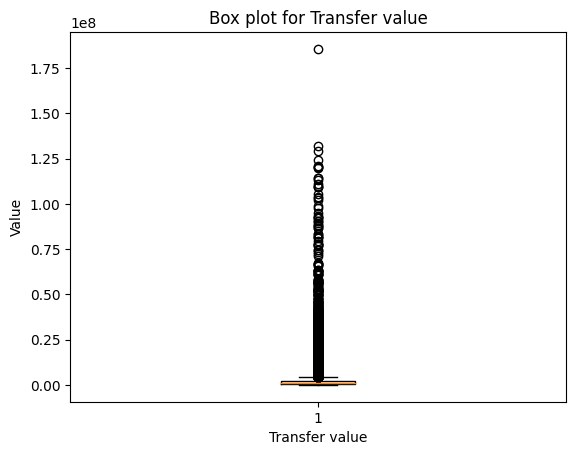

In [ ]:
# Box plot for Transfer value
plt.boxplot(final_df['int_value'])

# add labels and title
plt.xlabel('Transfer value')
plt.ylabel('Value')
plt.title('Box plot for Transfer value')

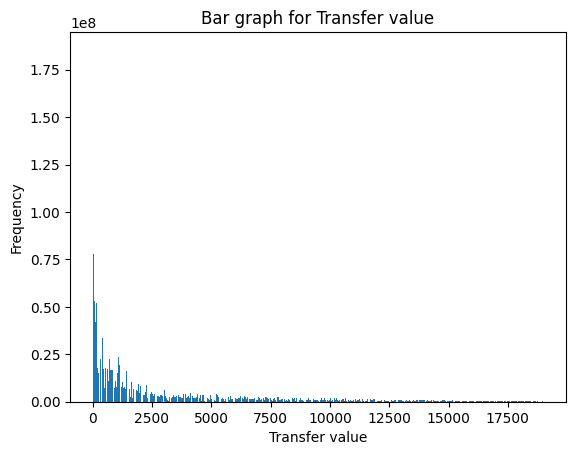

In [ ]:
# Create a histogram for Transfer value
plt.bar(final_df.index, final_df['int_value'])

# add labels and title
plt.xlabel('Transfer value')
plt.ylabel('Frequency')
plt.title('Bar graph for Transfer value')

# show the plot
plt.show()

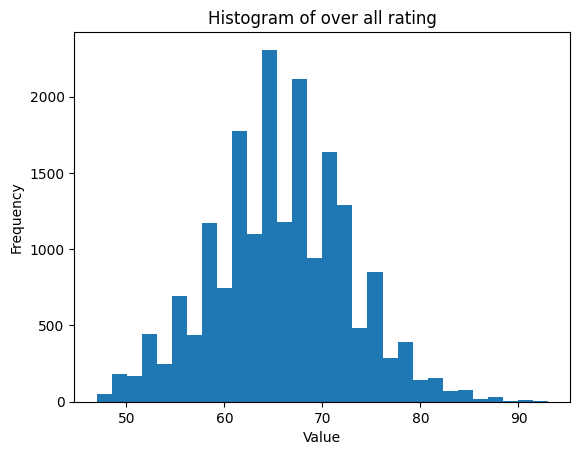

In [ ]:
# Create a histogram for Overall rating
plt.hist(df['int_overall_rating'], bins=30)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of over all rating')

plt.show()

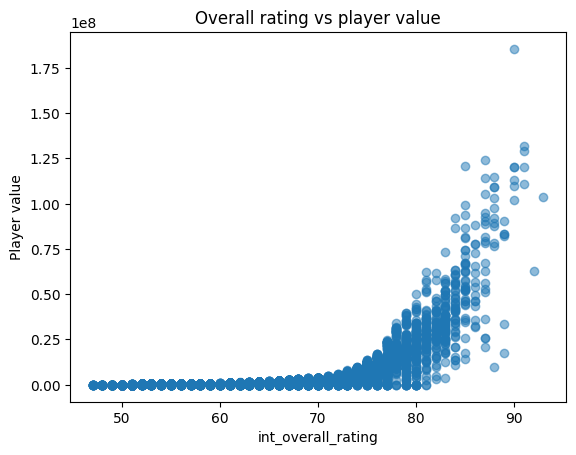

In [ ]:
# Scatter plot for overall rating vs player value

plt.scatter(df['int_overall_rating'], df['int_value'], alpha=0.5)
plt.title('Overall rating vs player value')
plt.xlabel('int_overall_rating')
plt.ylabel('Player value')
plt.show()


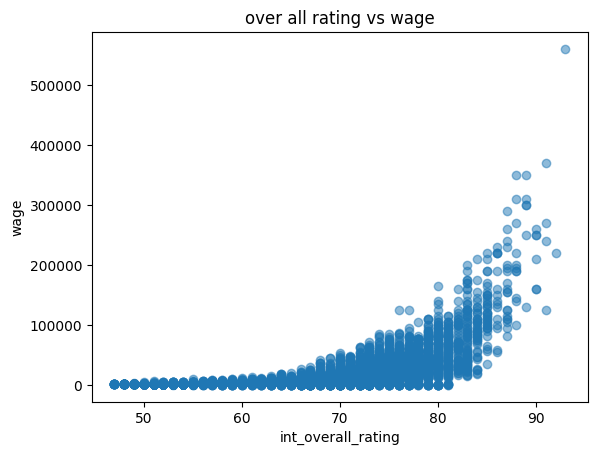

In [ ]:
# Scatter plot for overall rating vs wage

plt.scatter(df['int_overall_rating'], df['int_wage'], alpha=0.5)
plt.title('over all rating vs wage')
plt.xlabel('int_overall_rating')
plt.ylabel('wage')
plt.show()

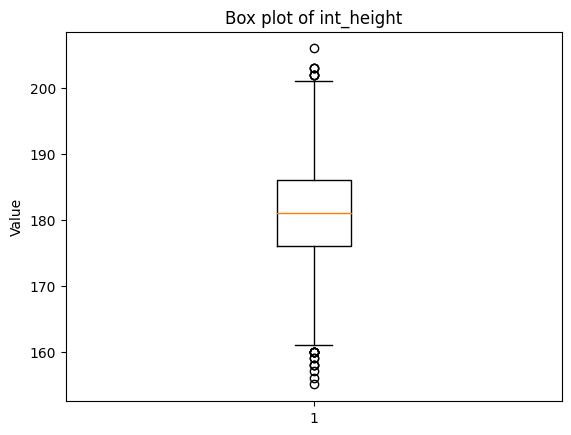

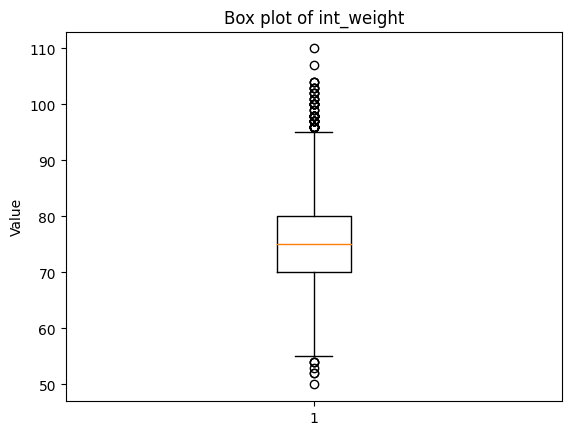

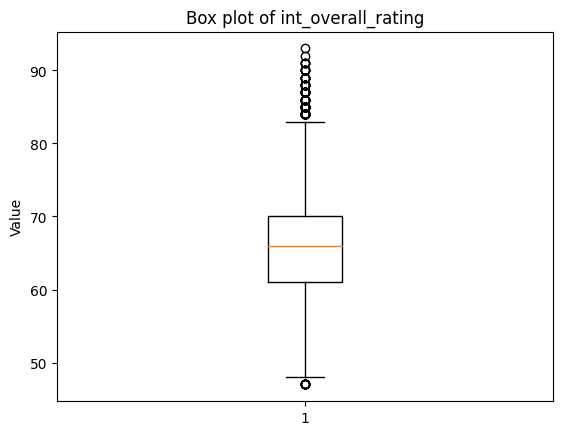

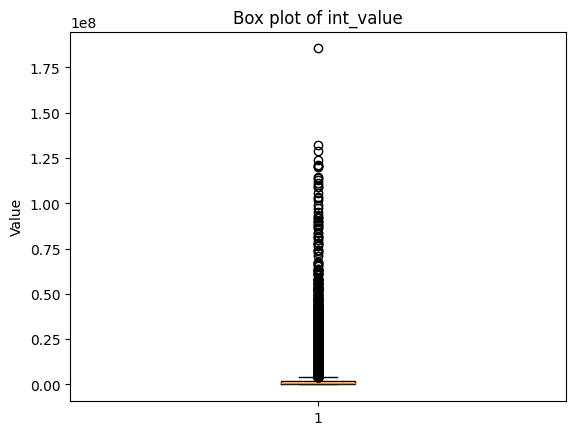

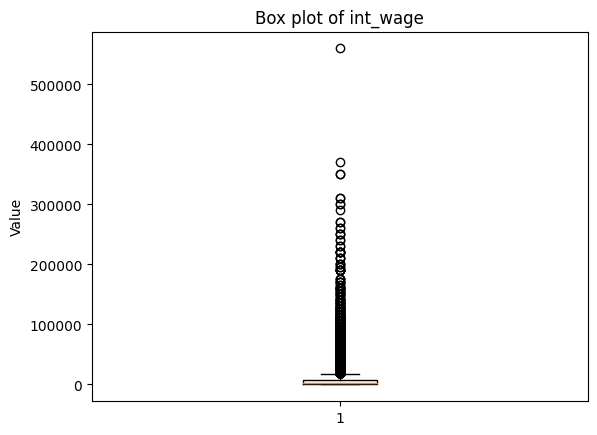

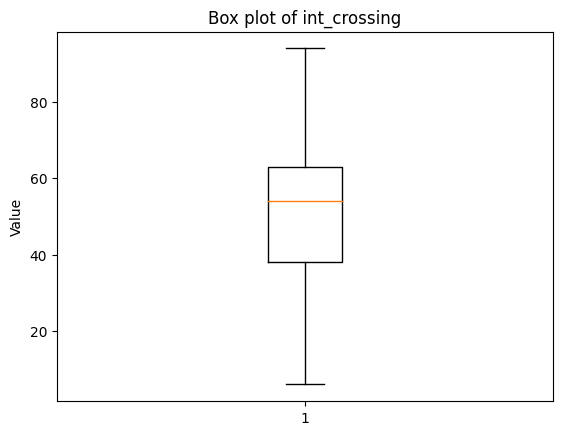

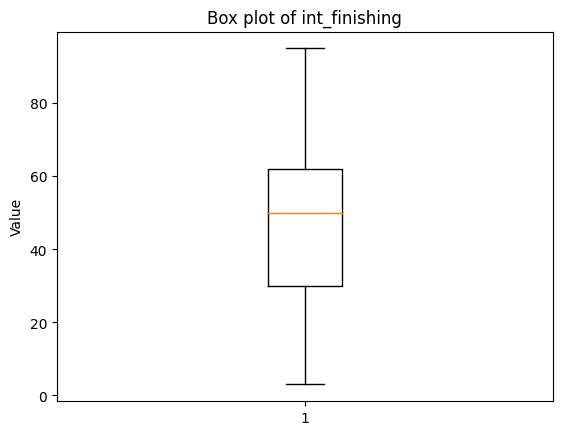

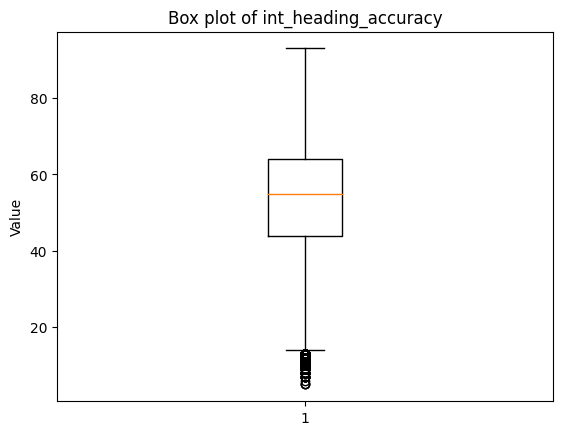

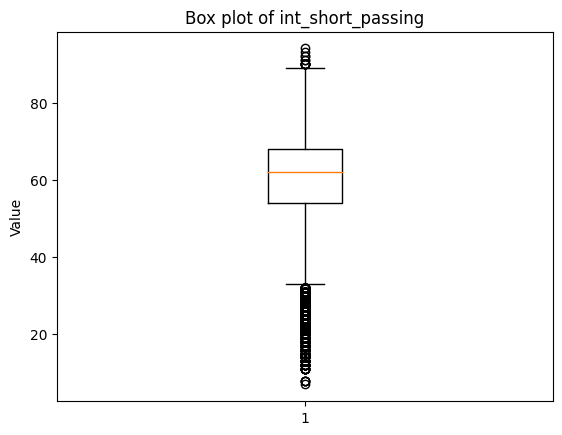

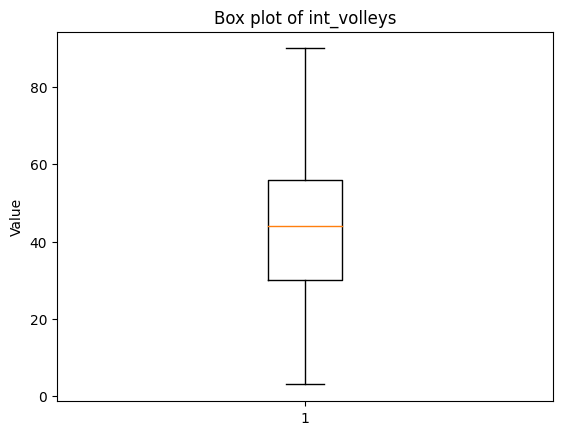

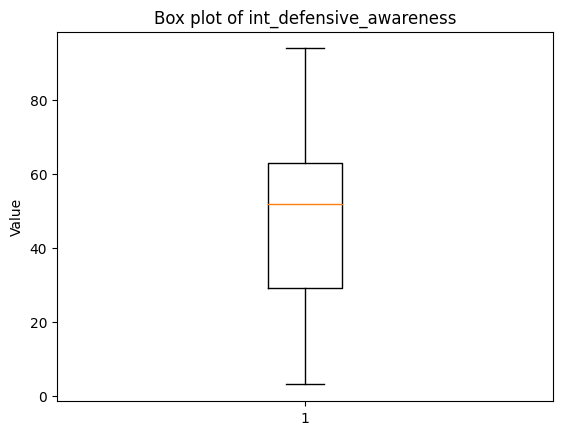

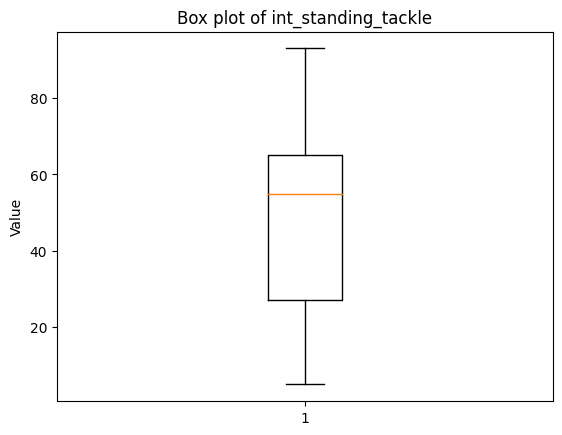

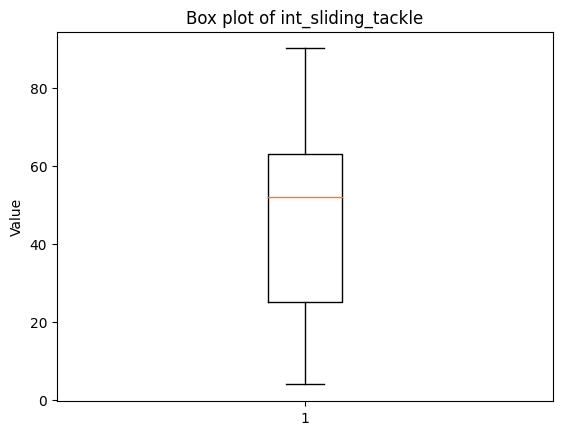

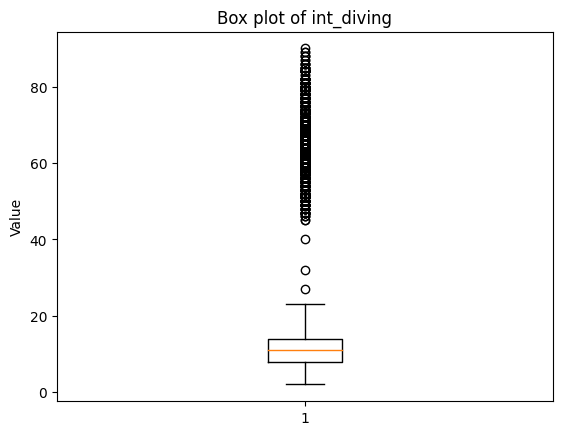

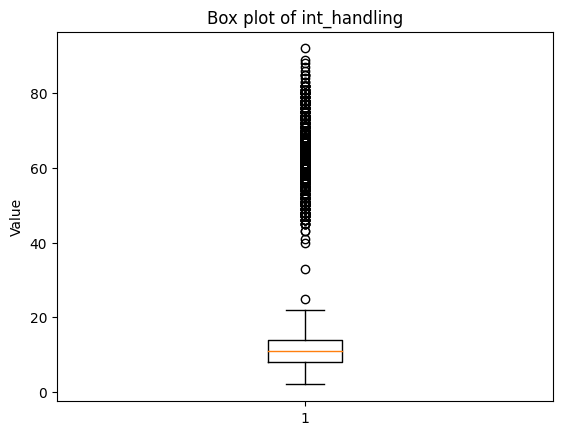

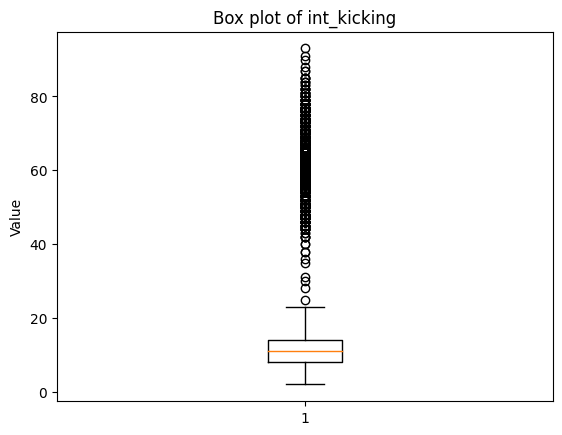

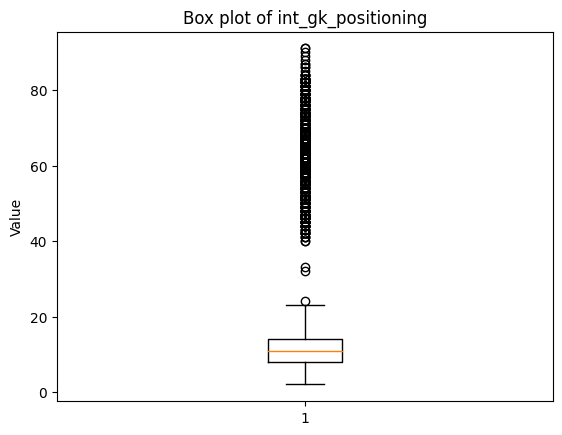

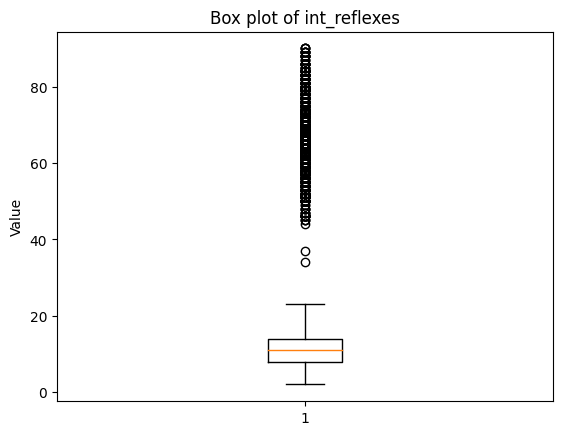

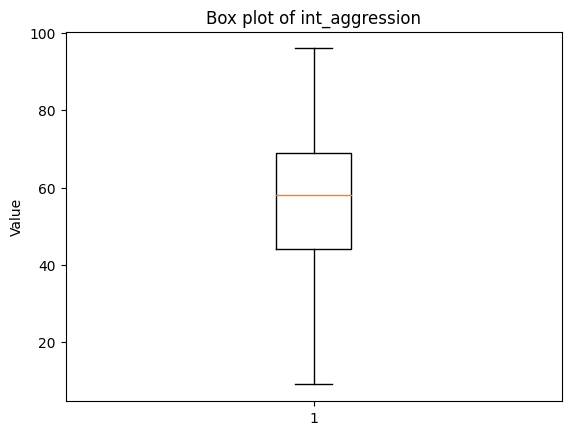

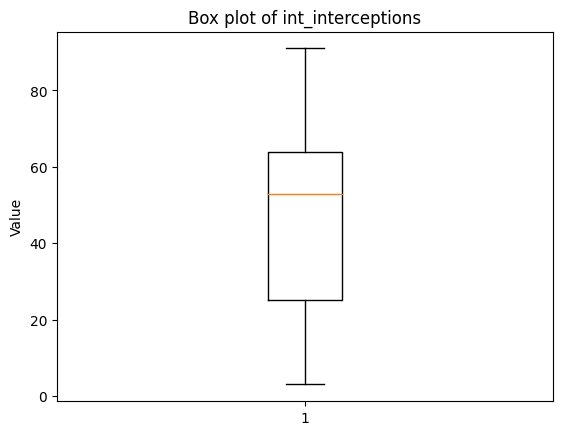

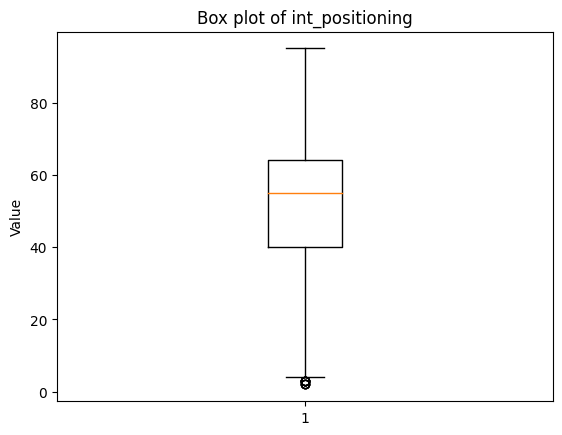

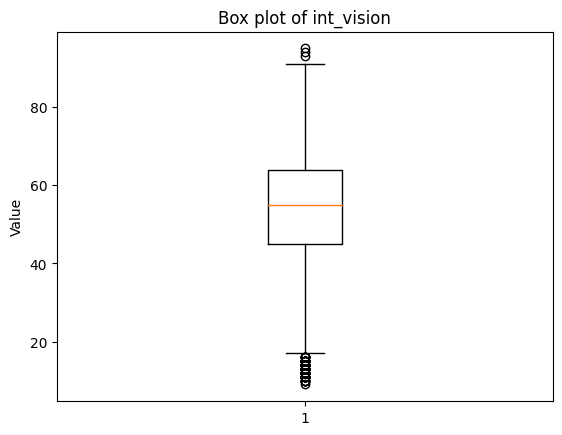

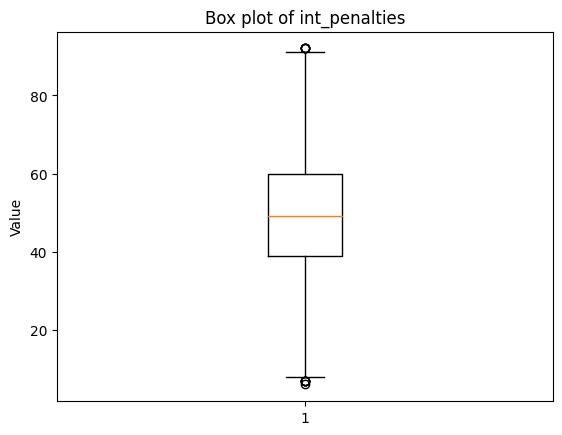

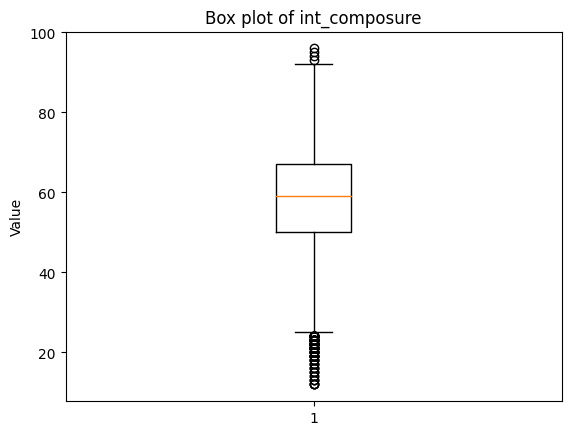

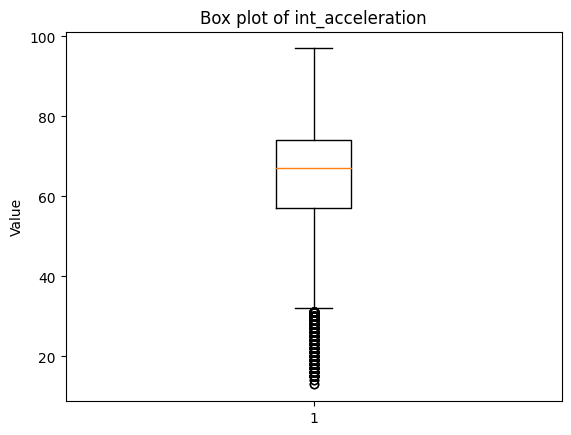

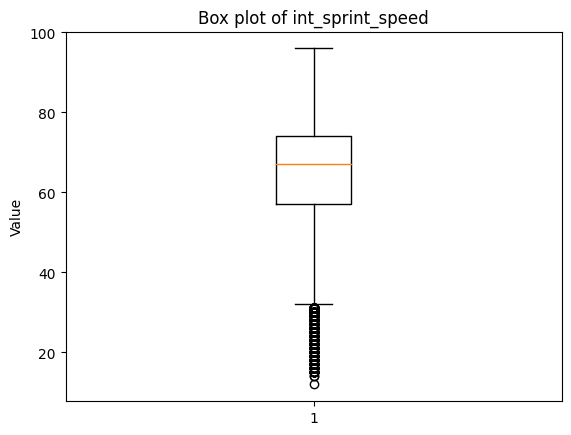

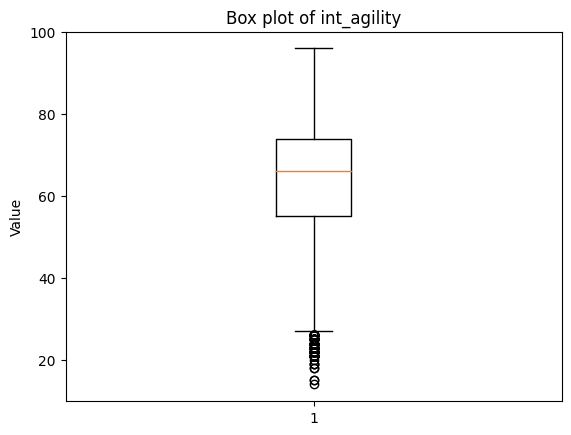

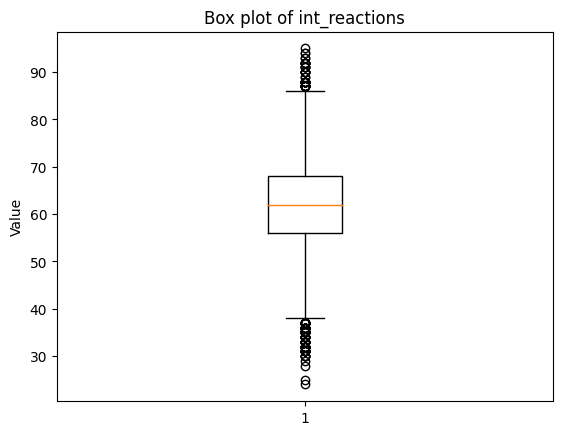

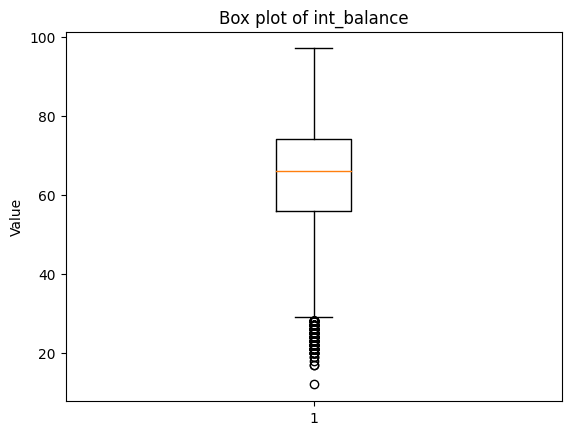

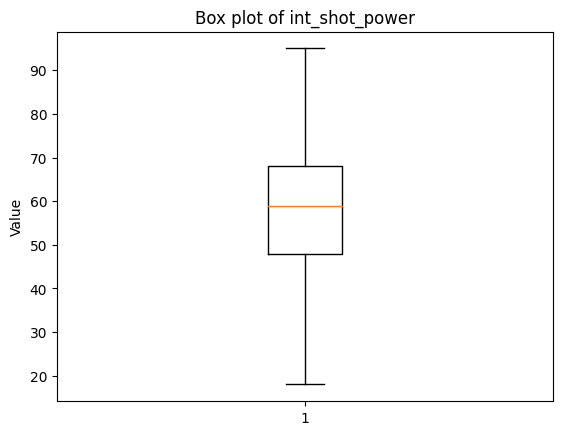

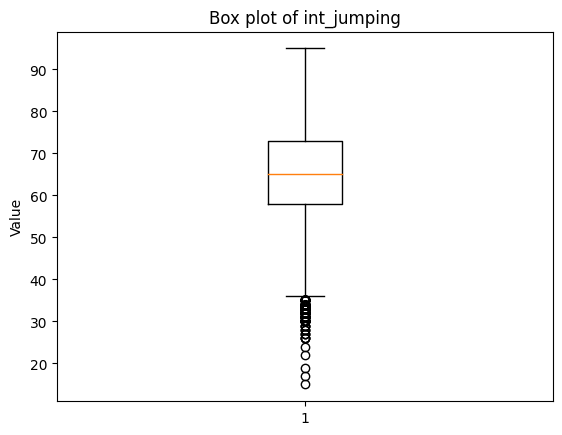

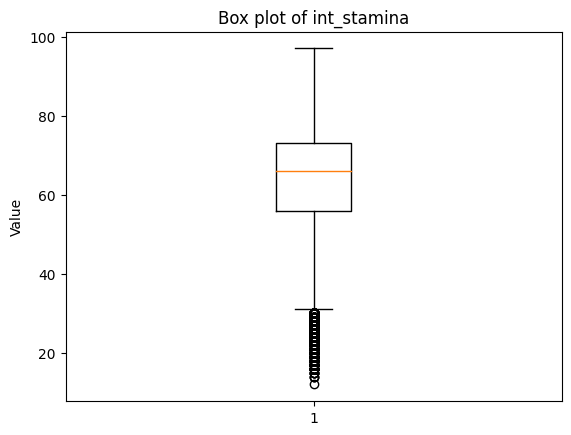

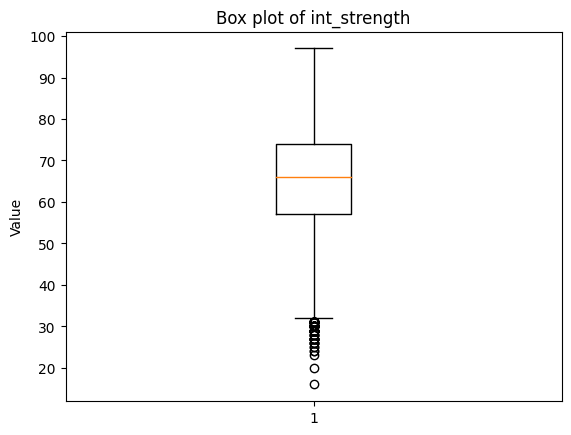

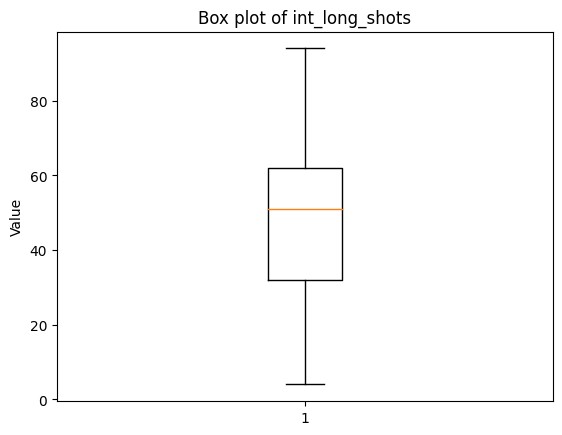

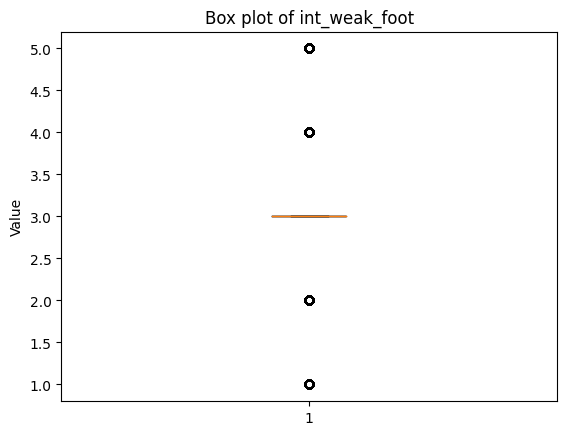

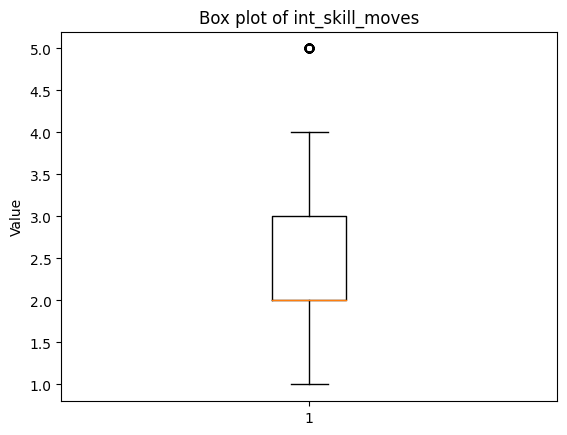

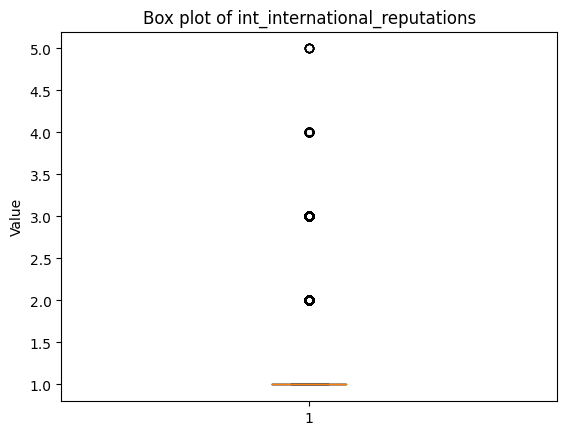

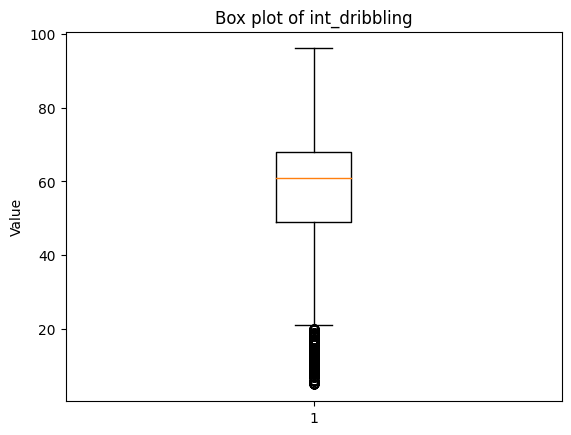

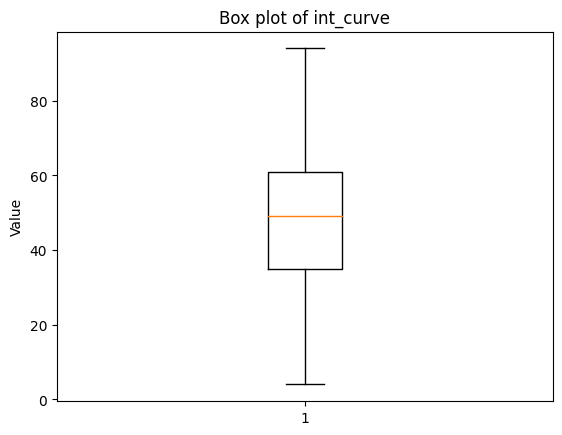

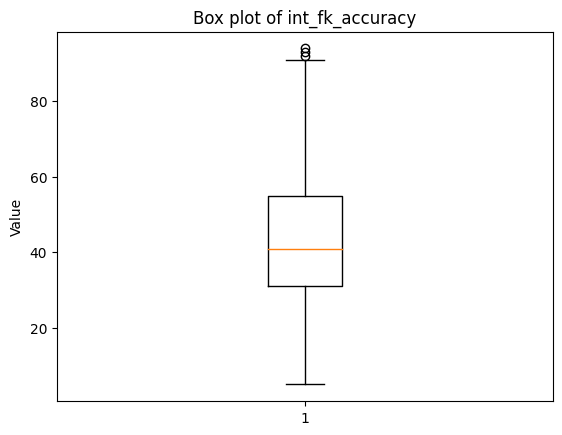

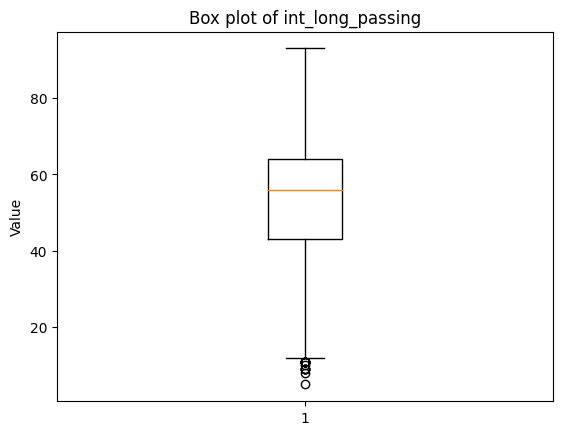

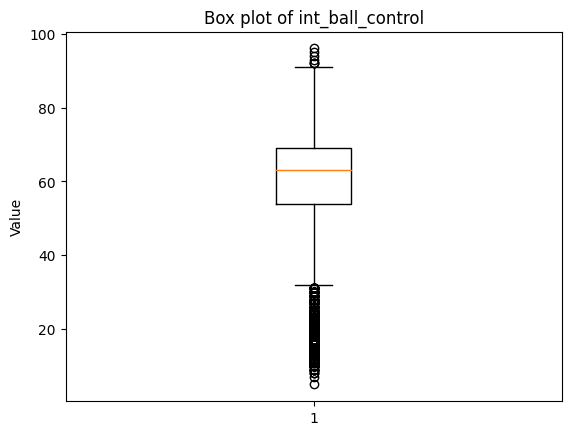

In [ ]:
# identify the categorical and continuous variables
categorical_vars = []
continuous_vars = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)

# create box plots for the continuous variables
for column in continuous_vars:
    plt.boxplot(df[column])
    plt.ylabel('Value')
    plt.title(f'Box plot of {column}')
    plt.show()


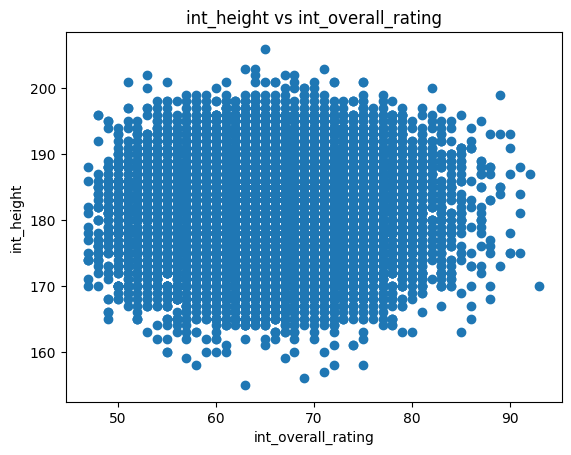

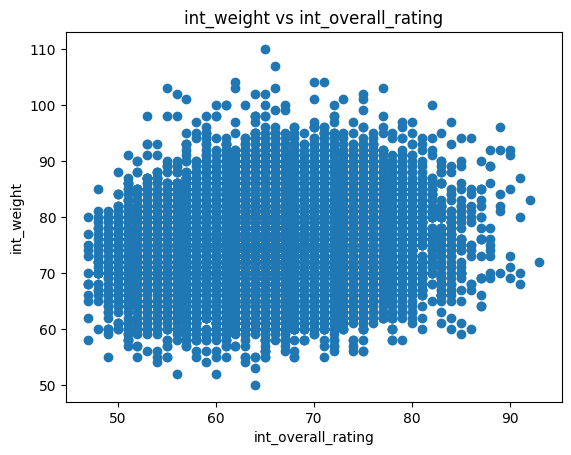

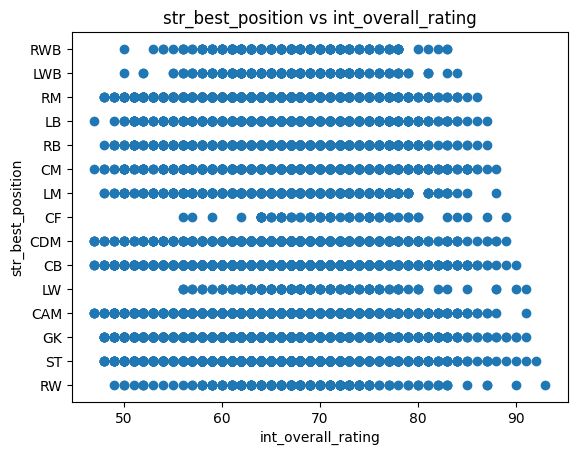

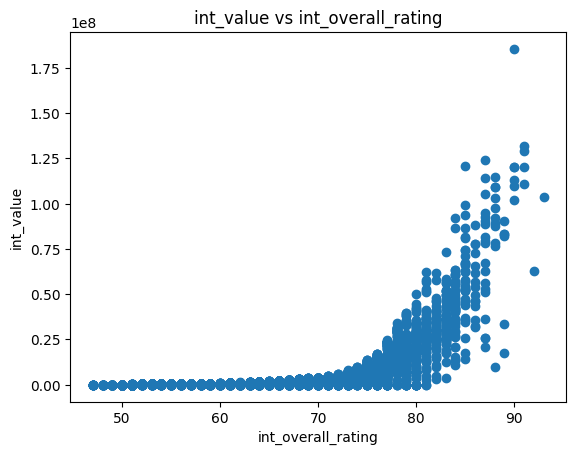

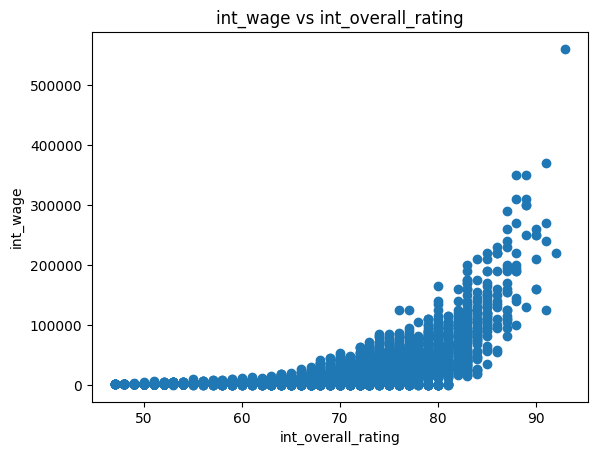

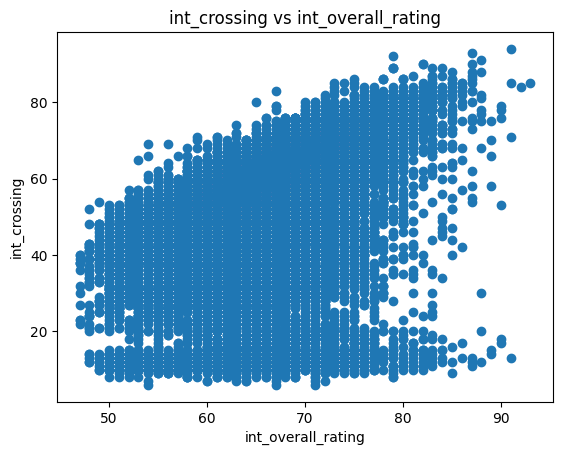

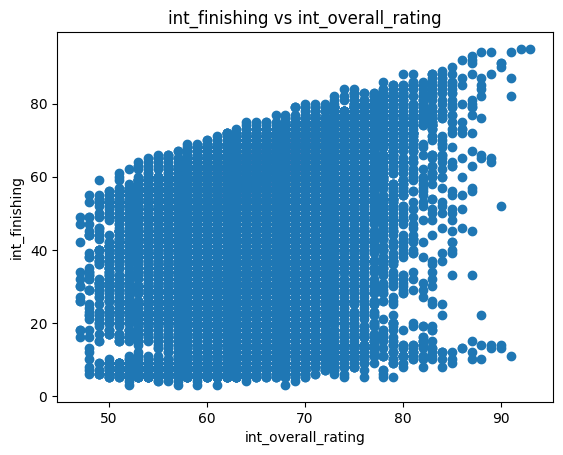

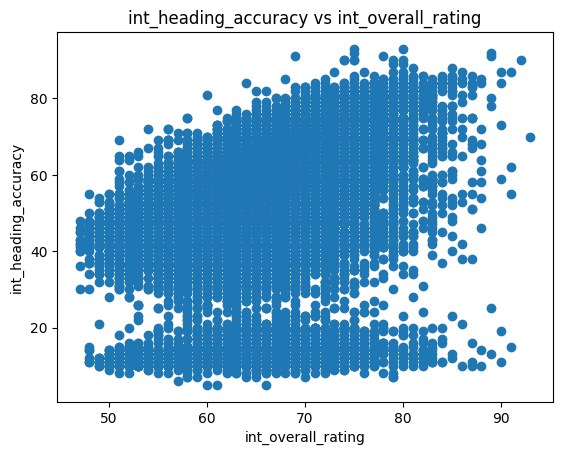

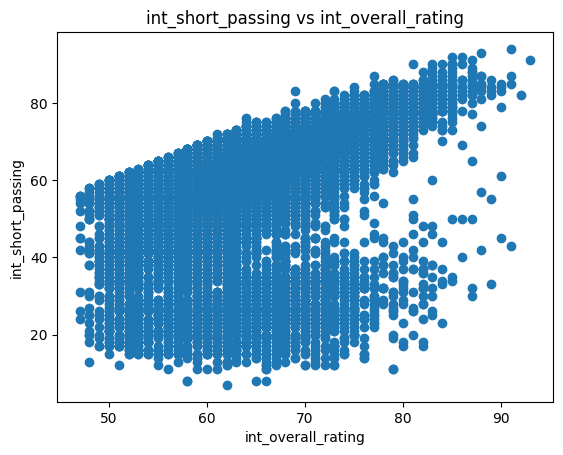

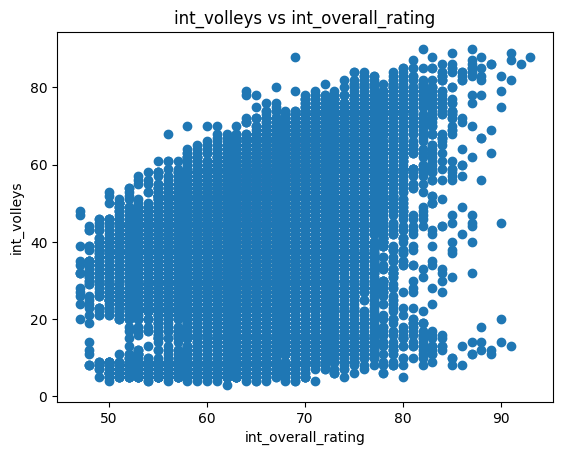

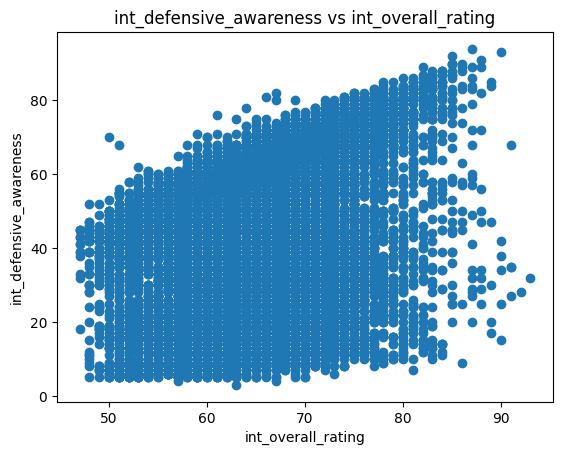

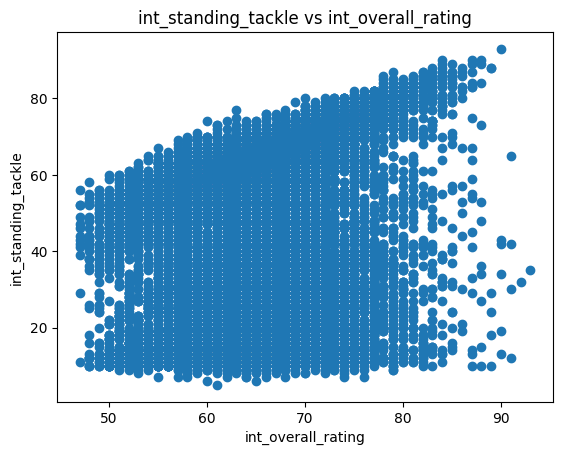

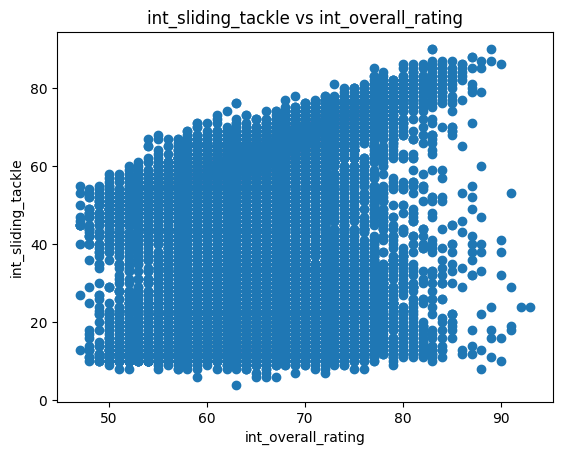

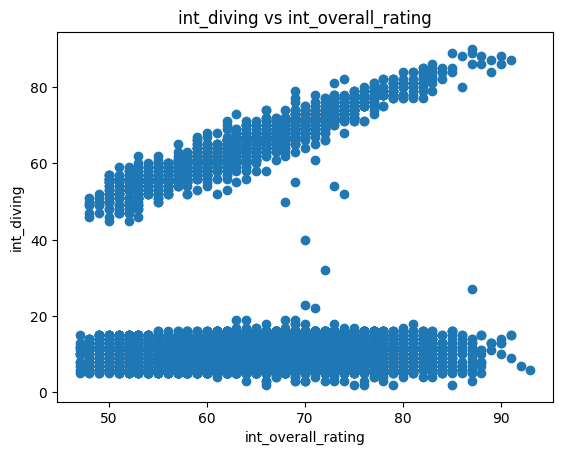

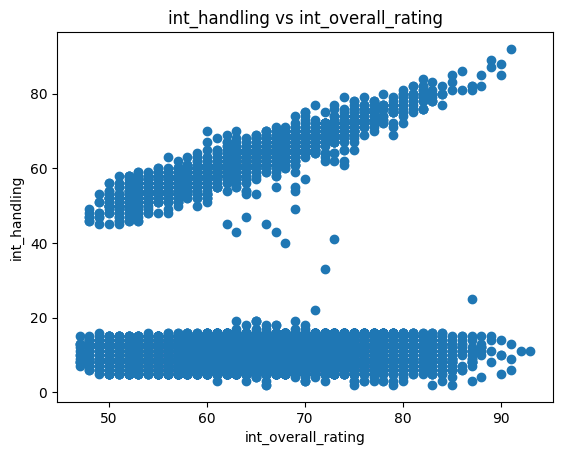

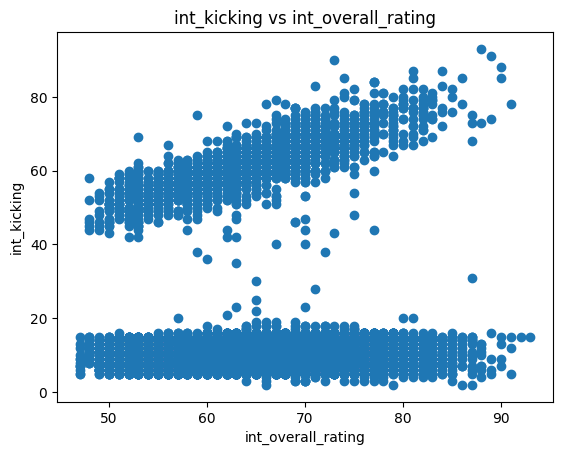

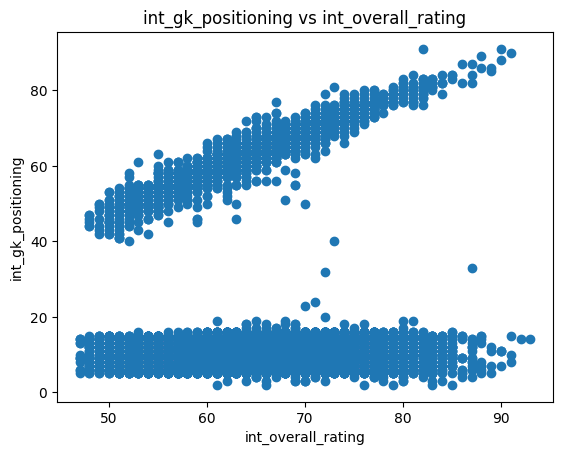

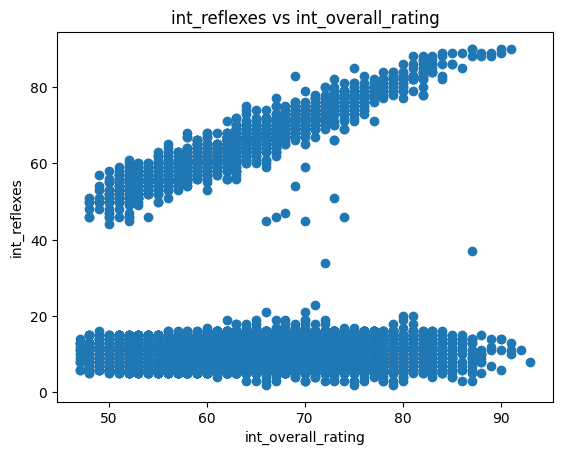

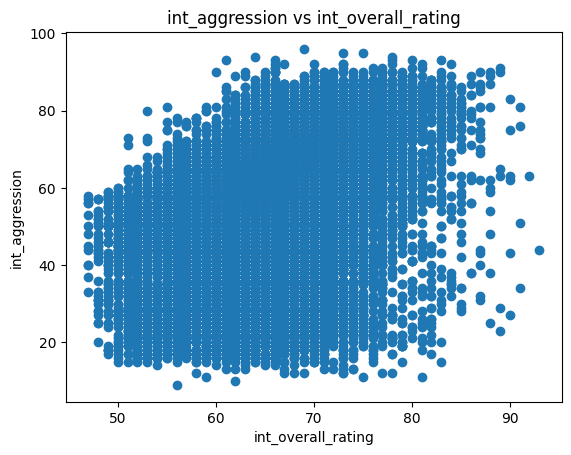

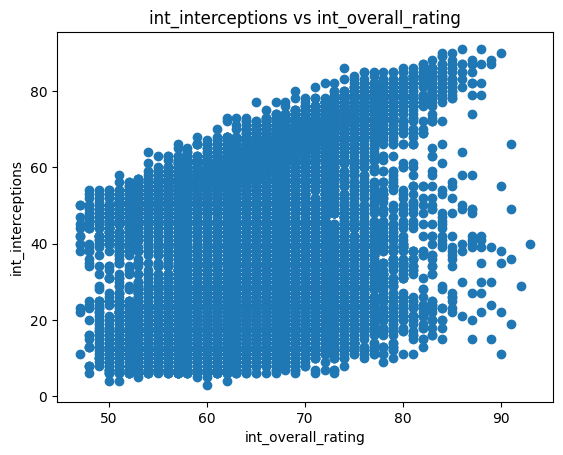

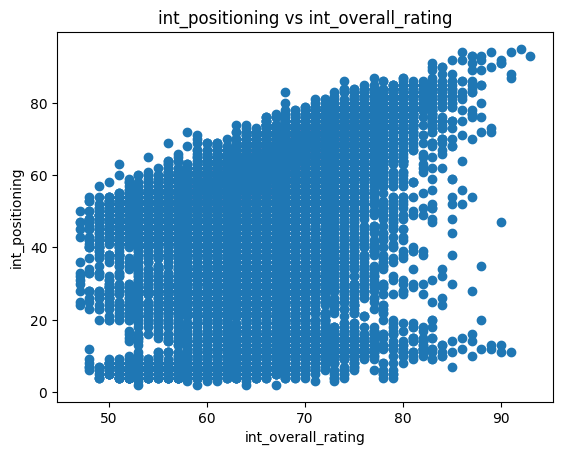

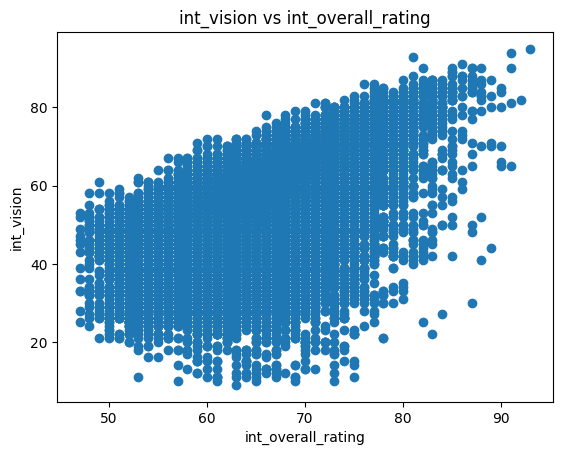

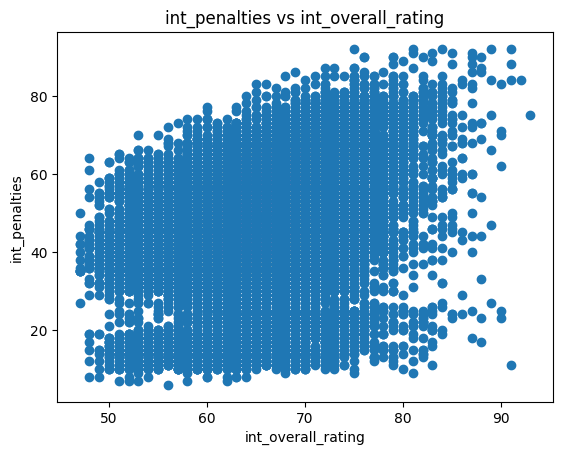

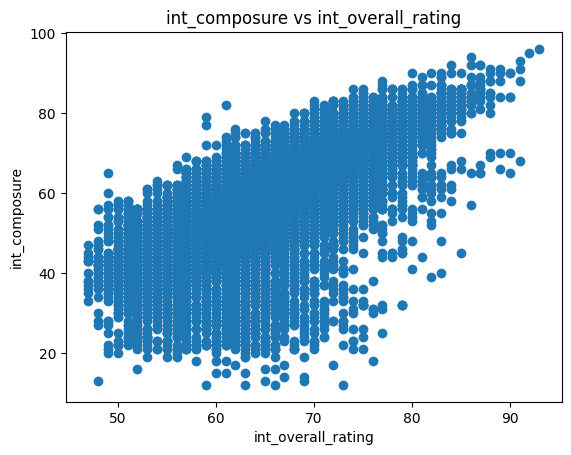

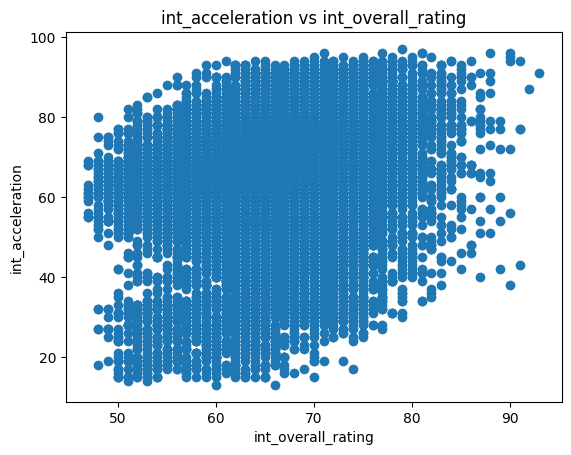

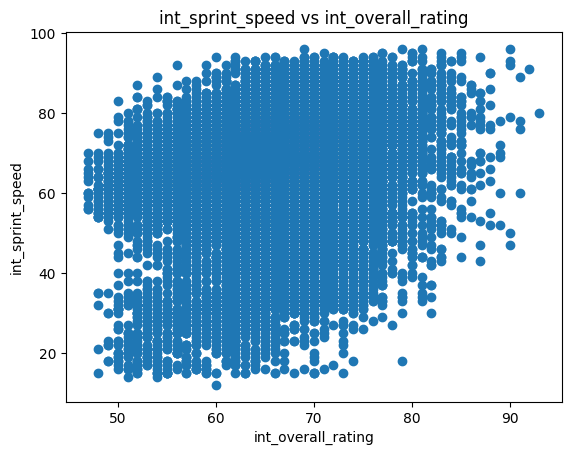

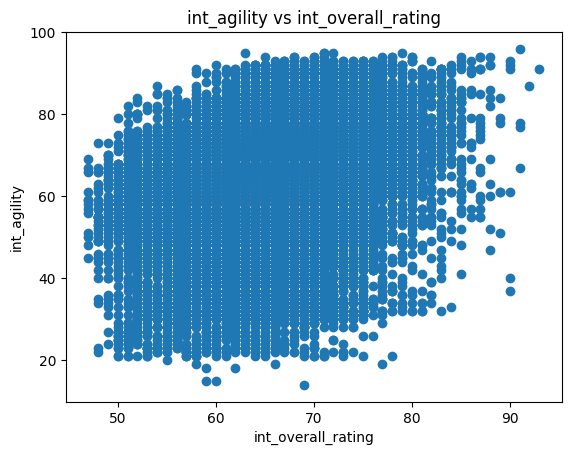

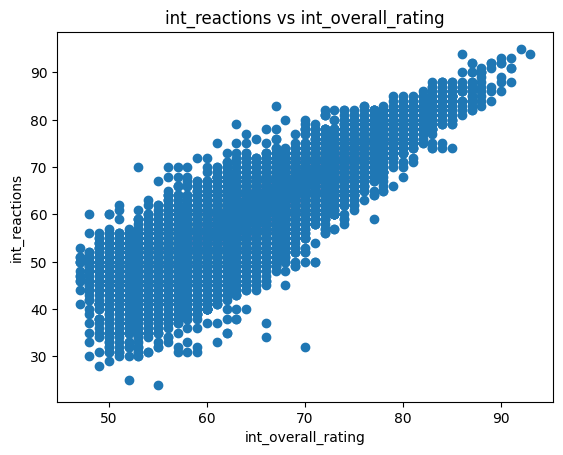

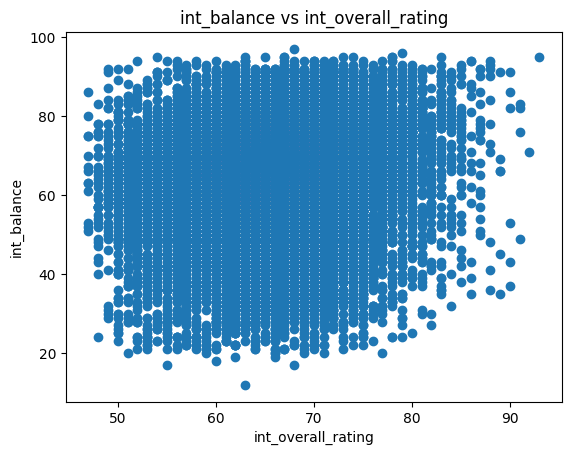

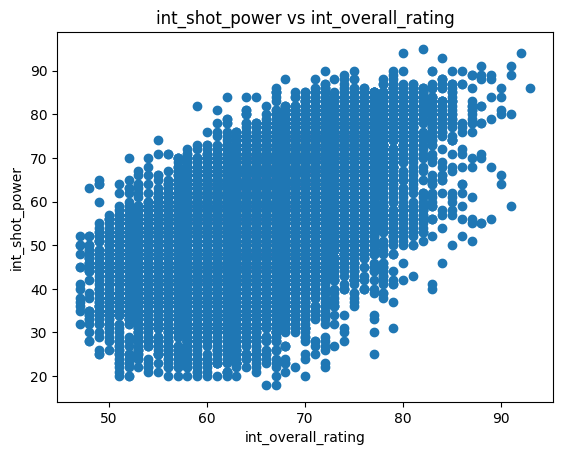

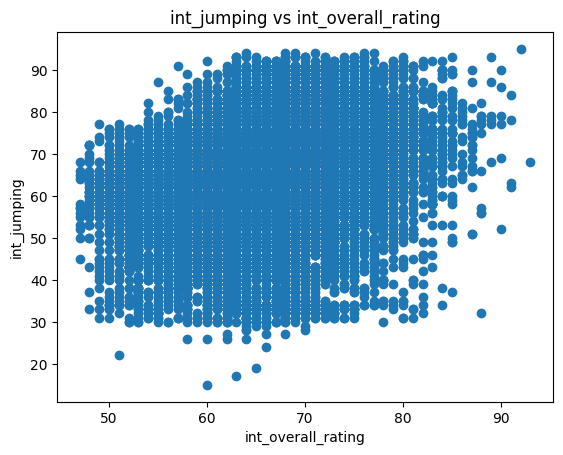

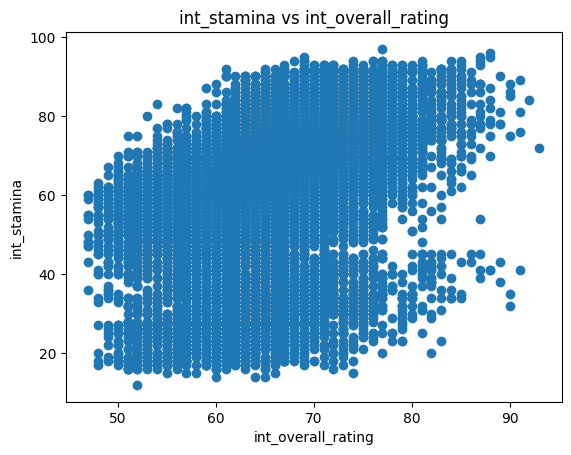

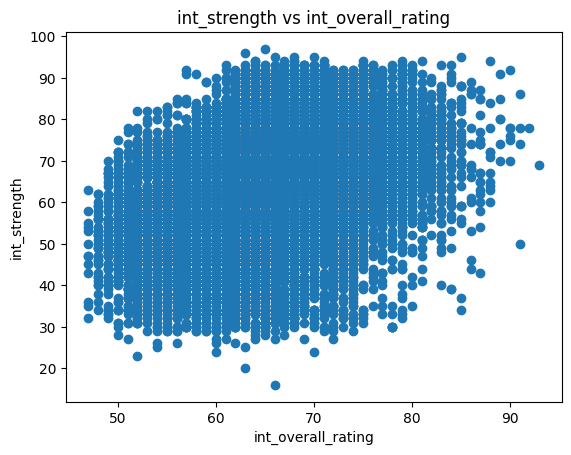

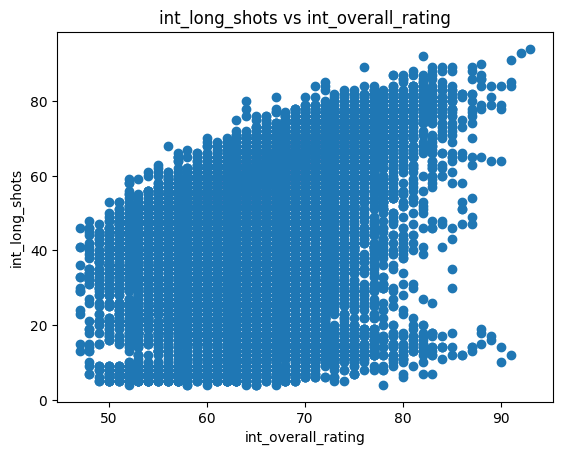

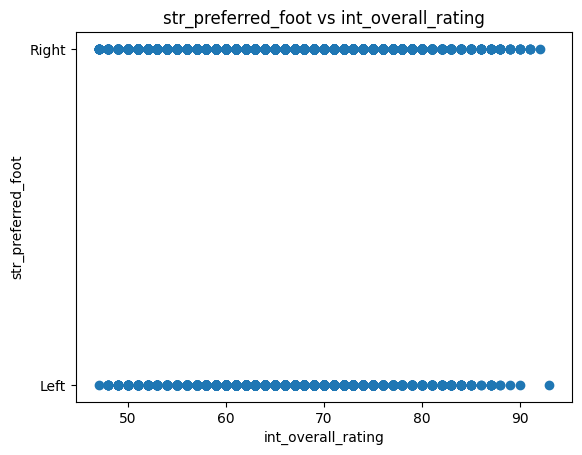

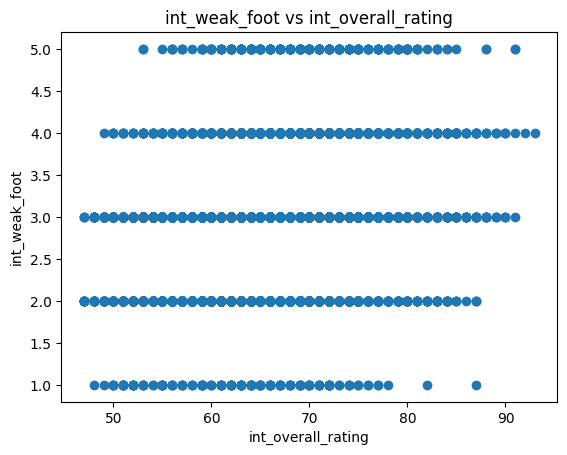

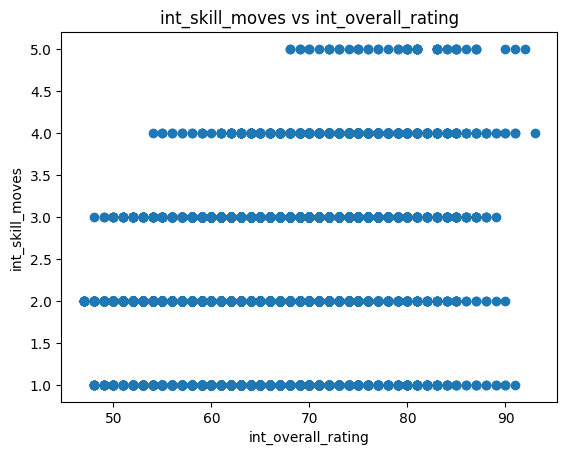

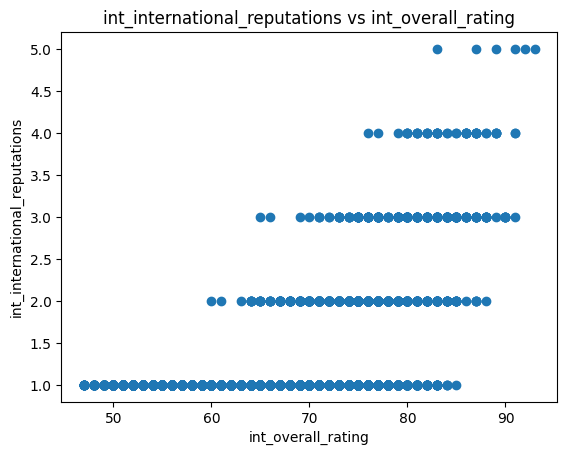

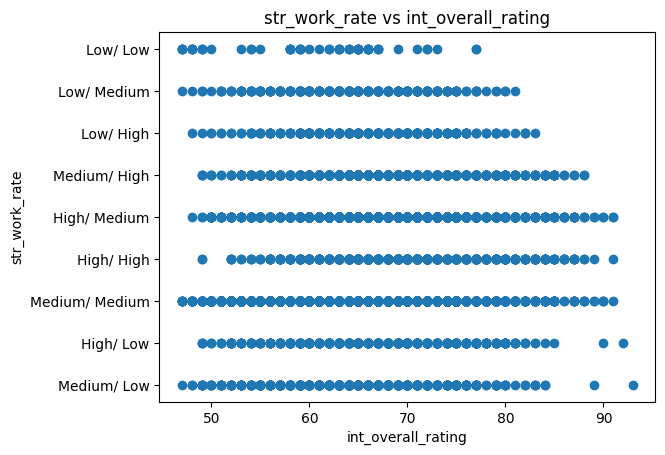

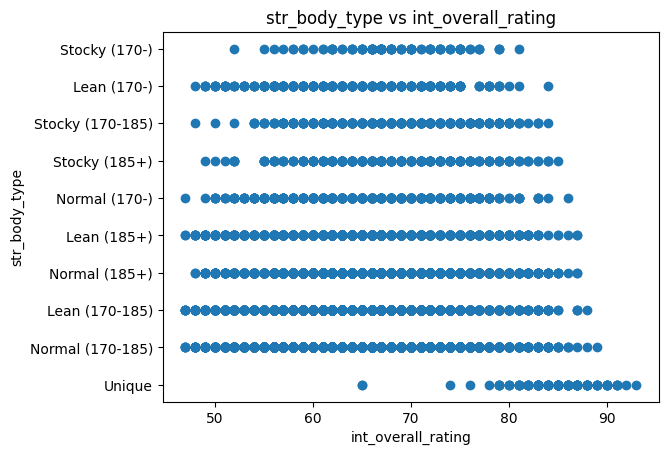

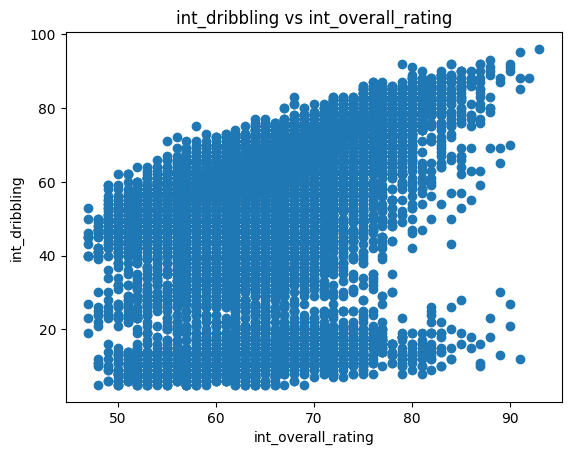

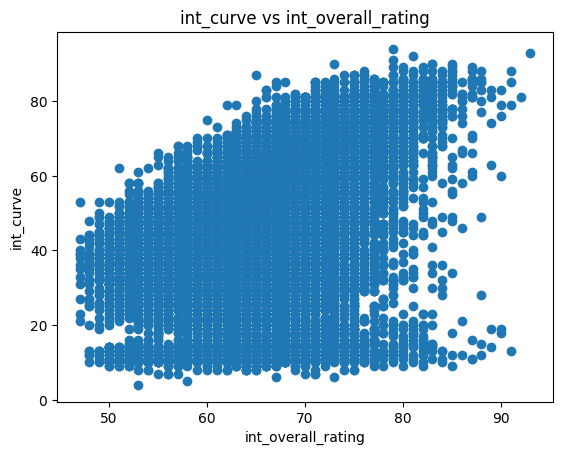

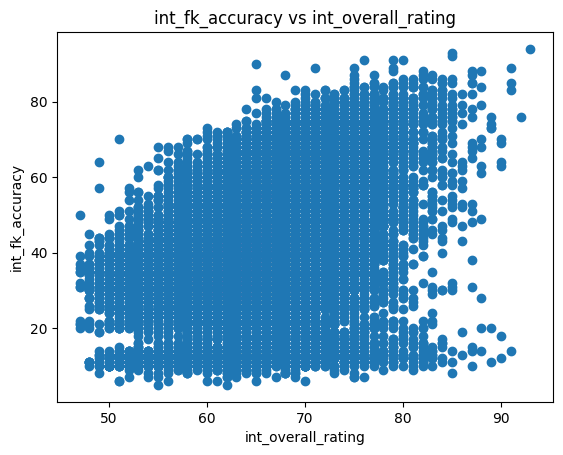

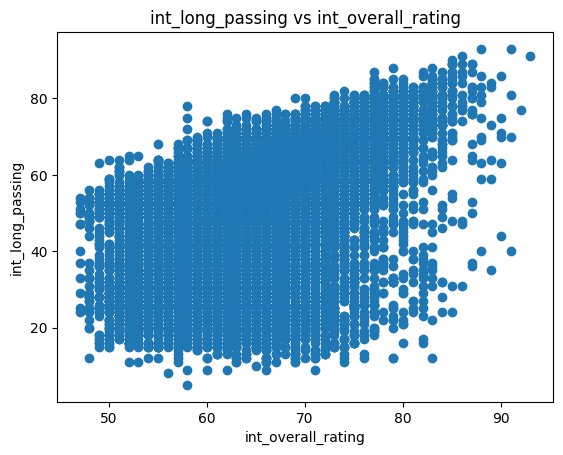

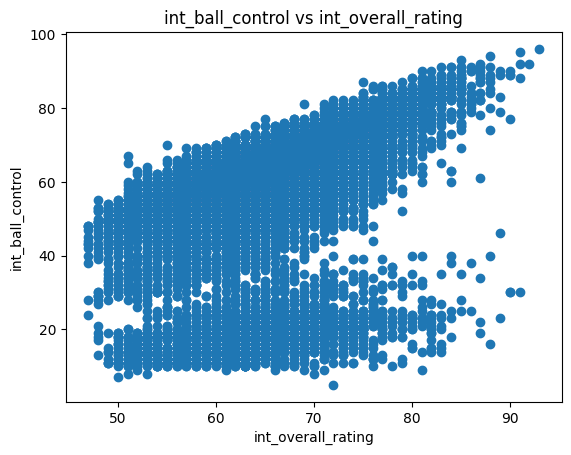

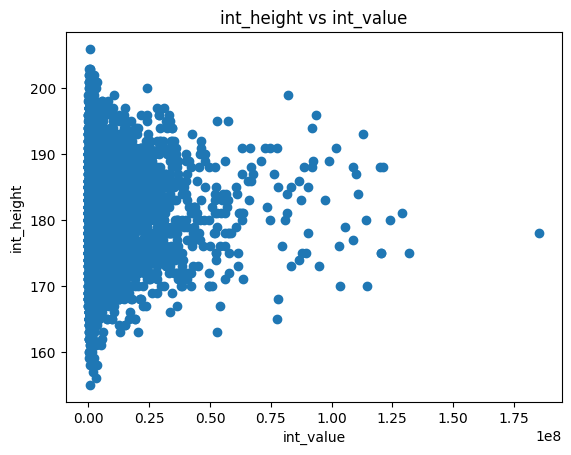

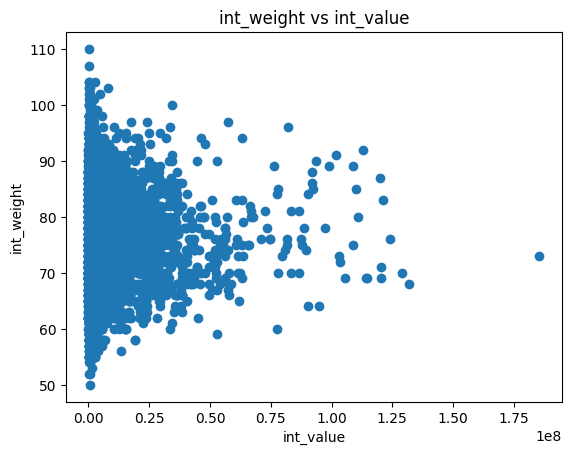

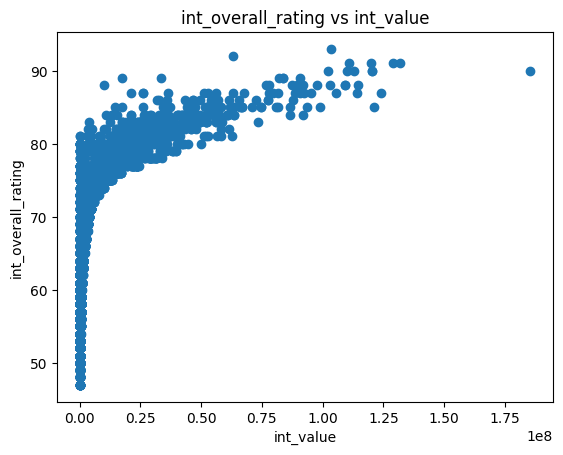

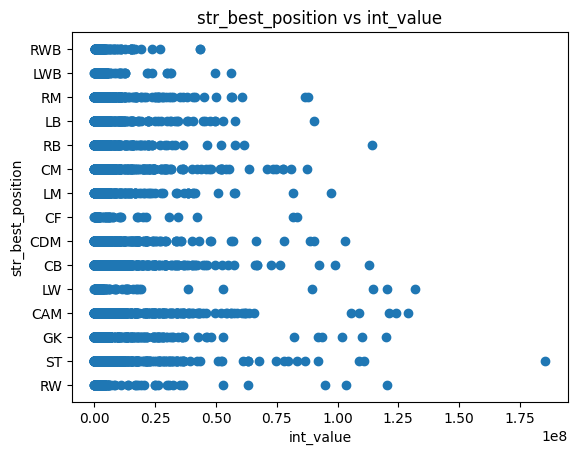

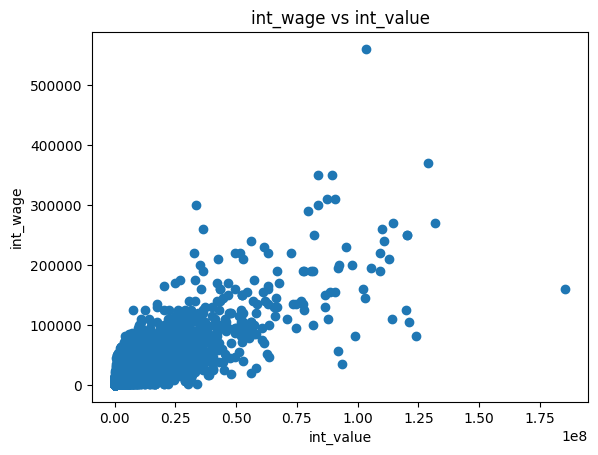

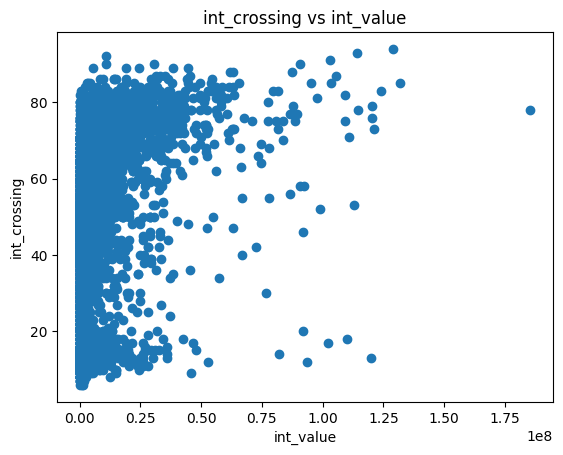

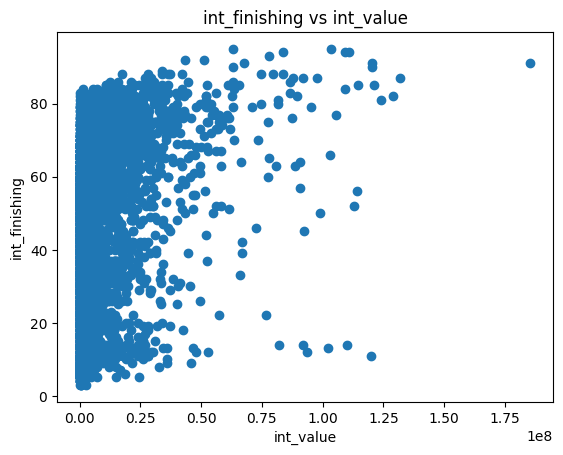

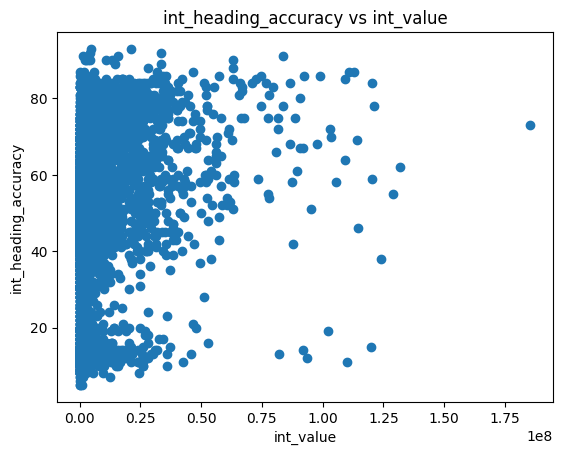

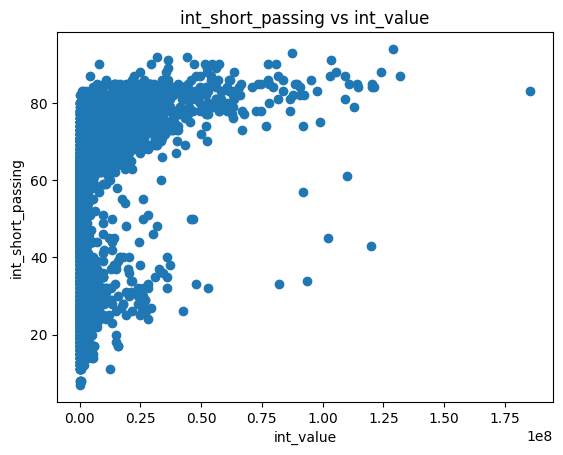

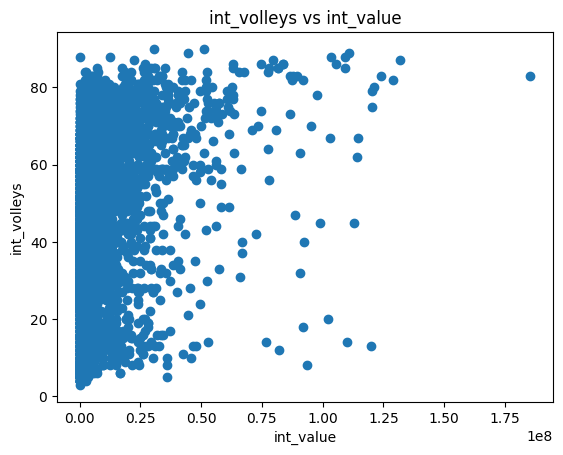

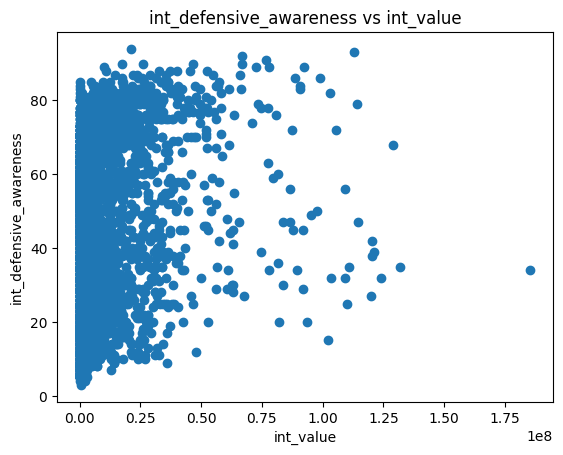

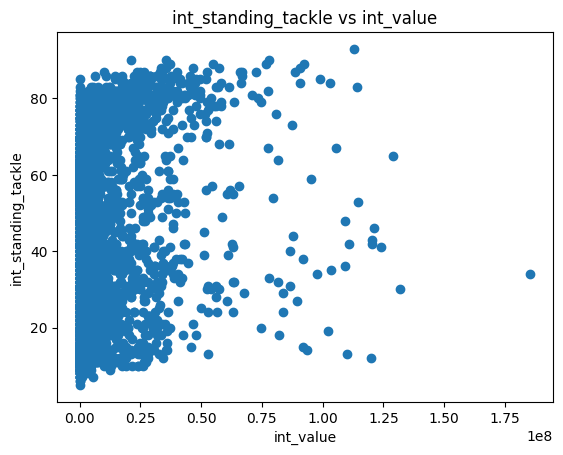

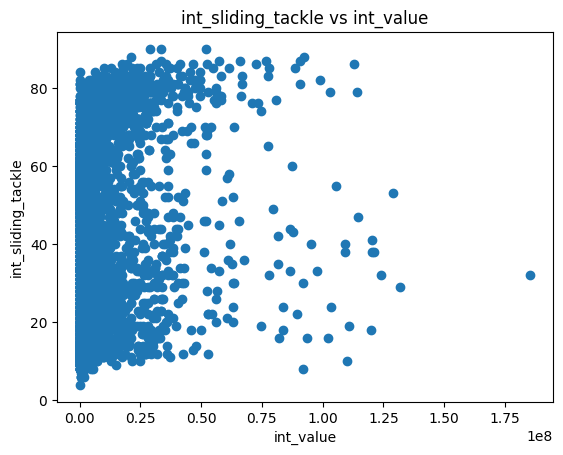

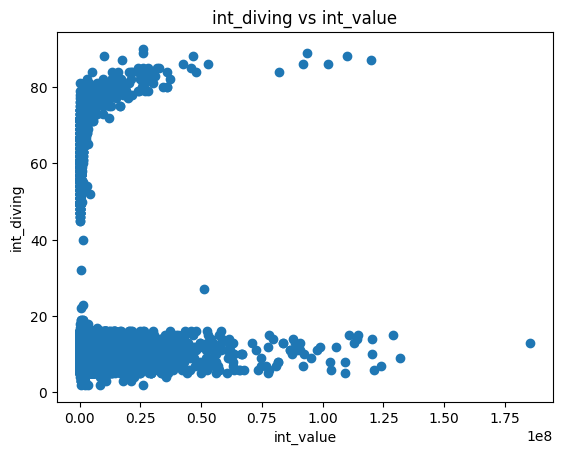

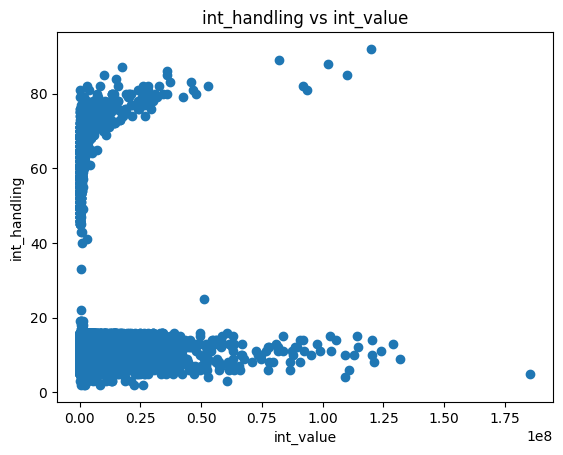

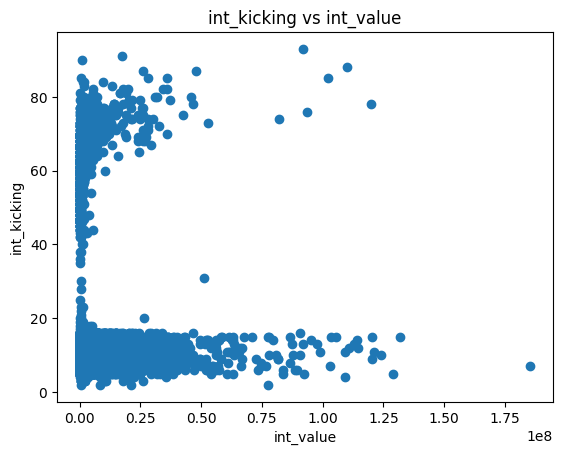

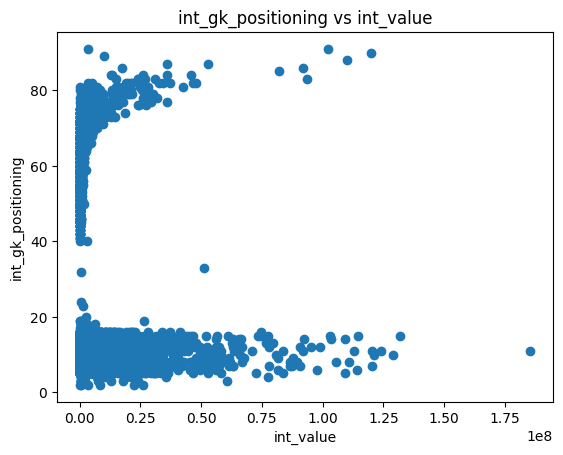

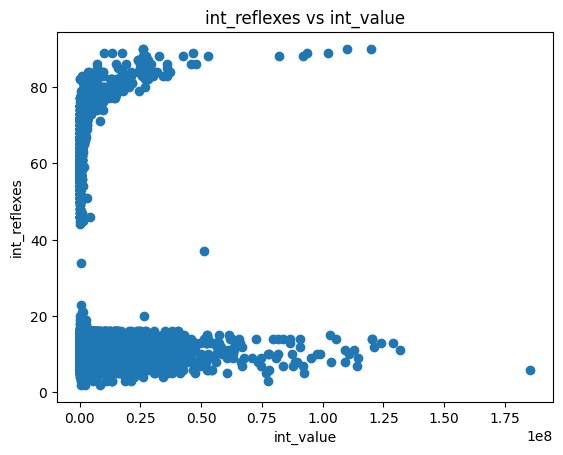

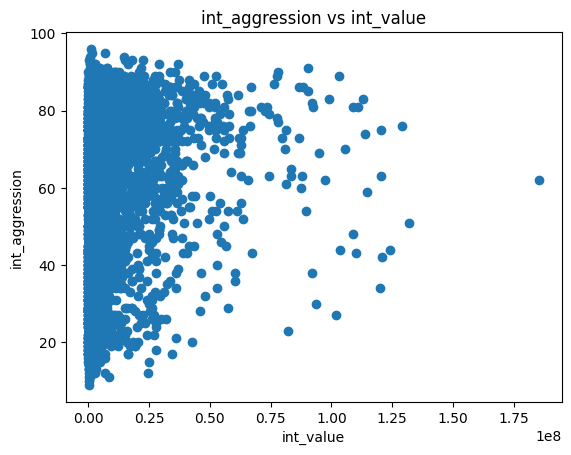

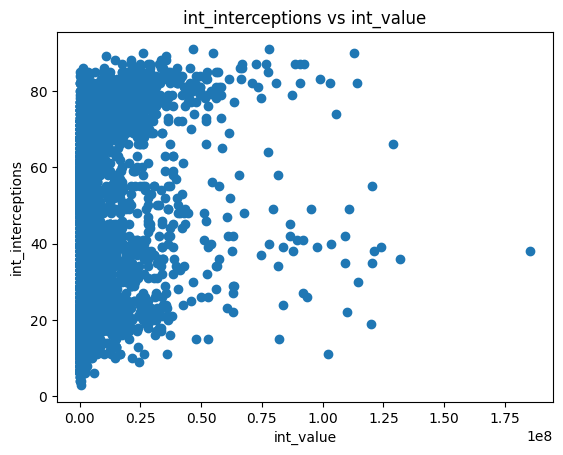

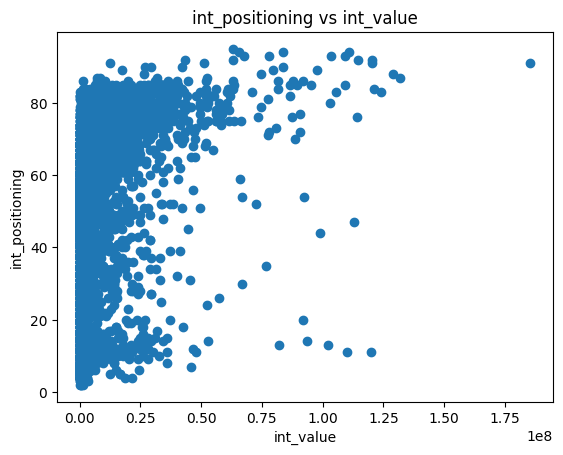

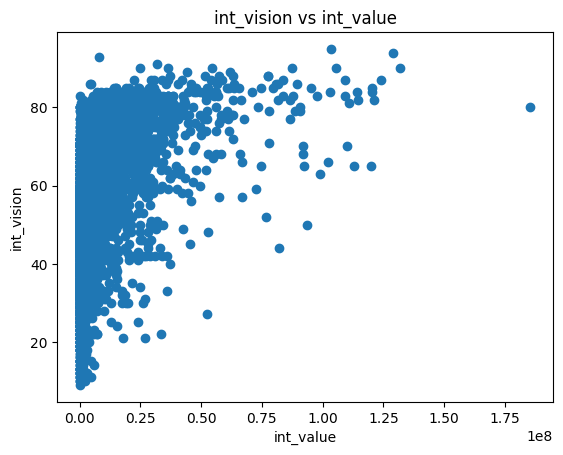

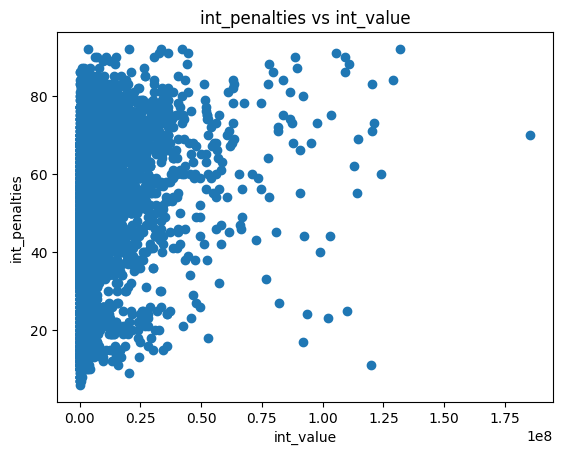

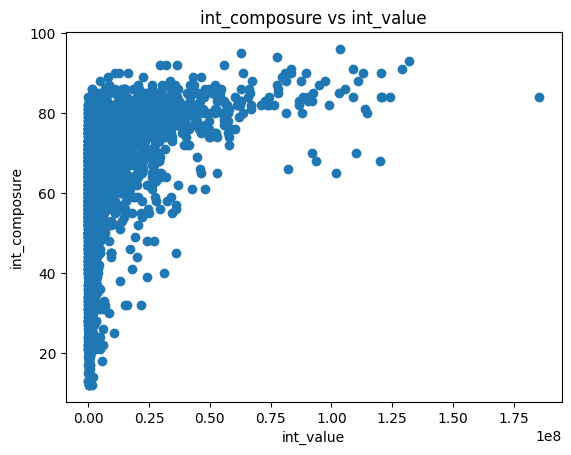

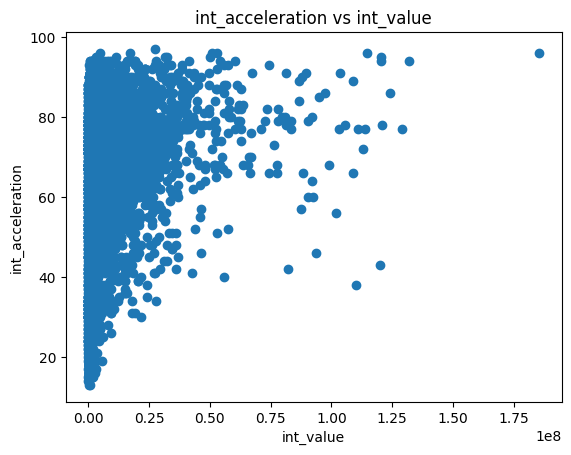

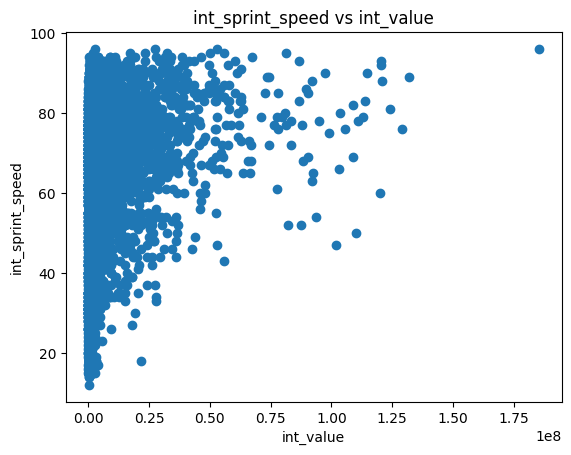

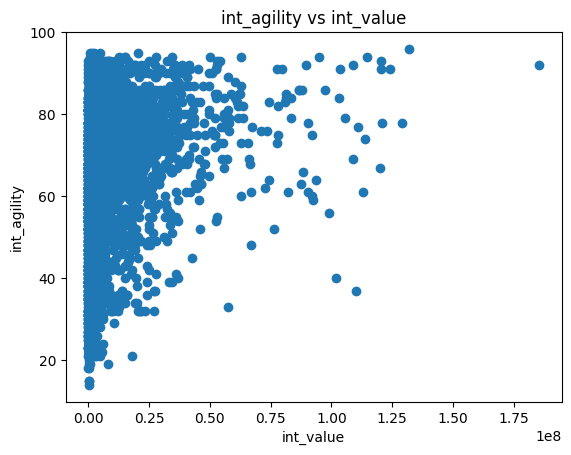

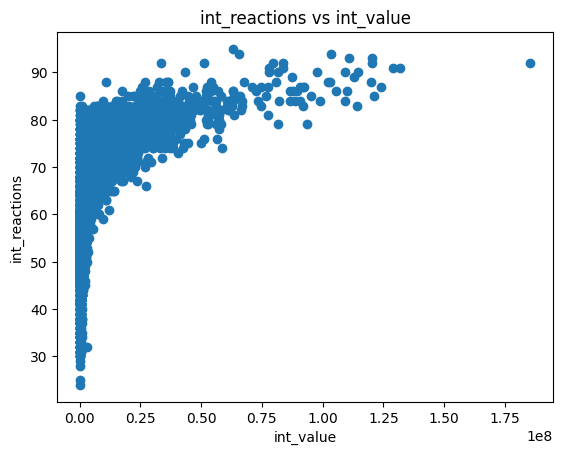

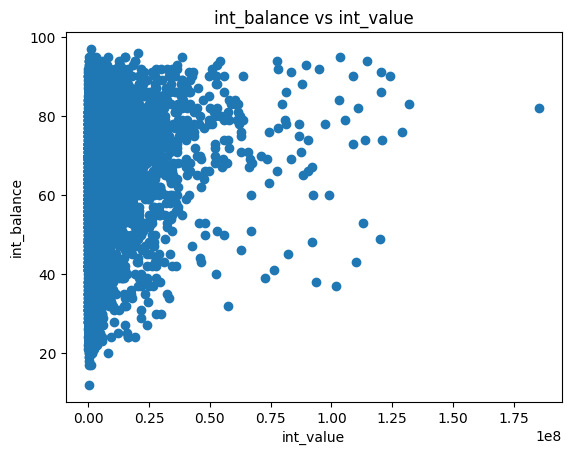

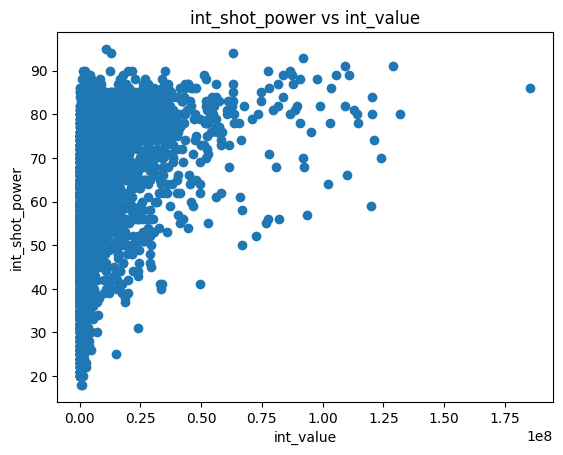

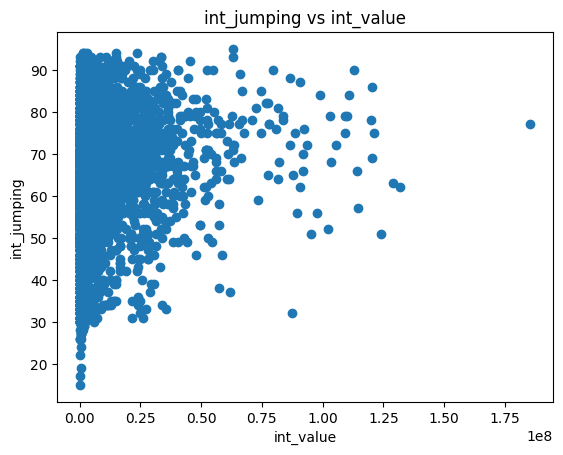

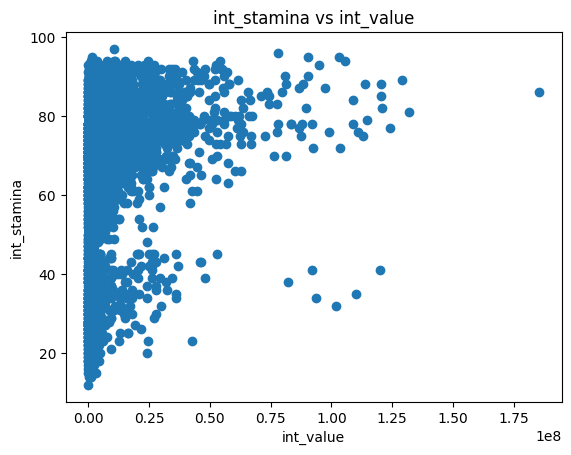

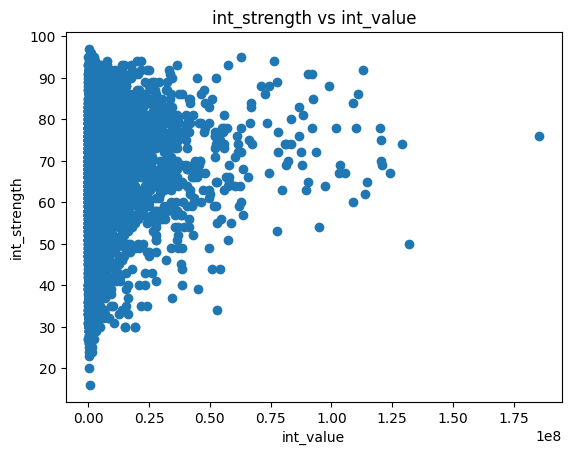

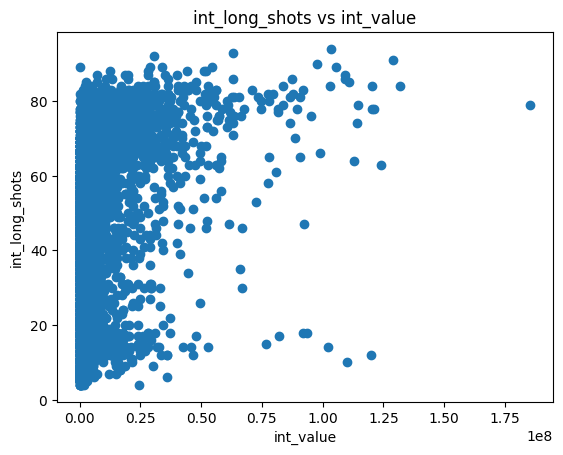

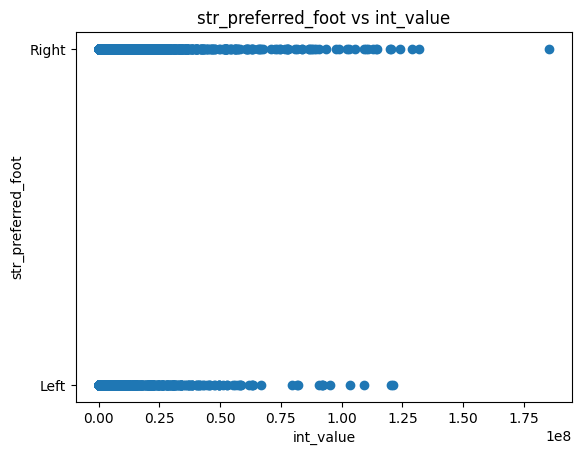

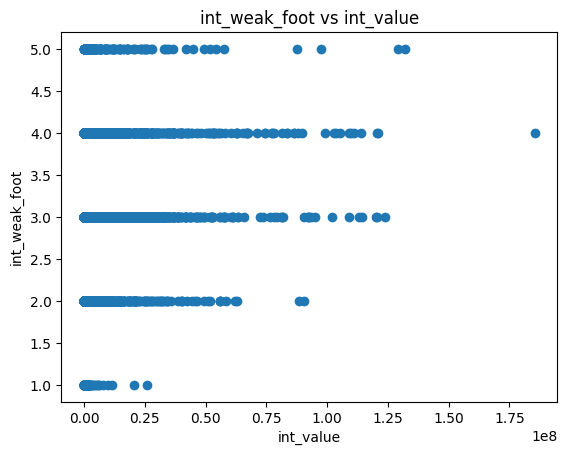

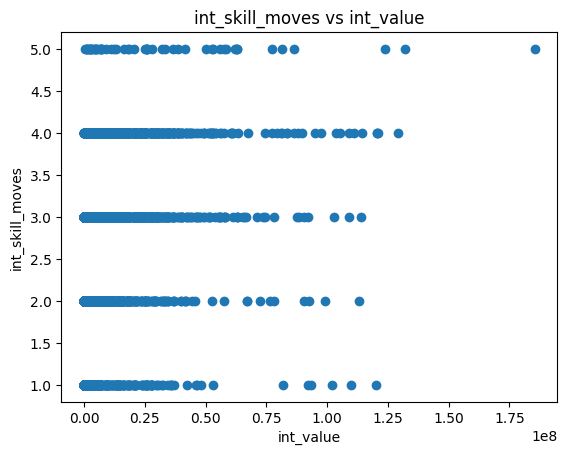

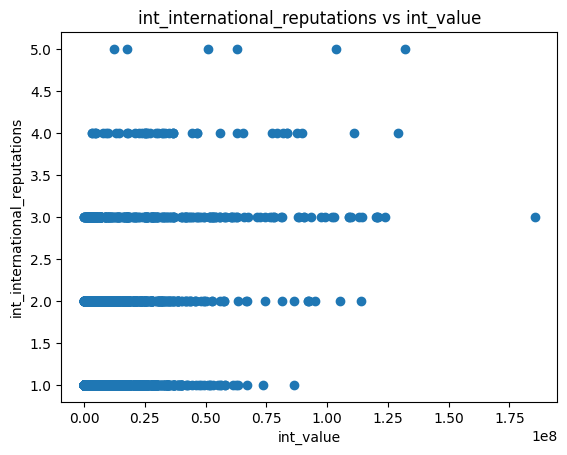

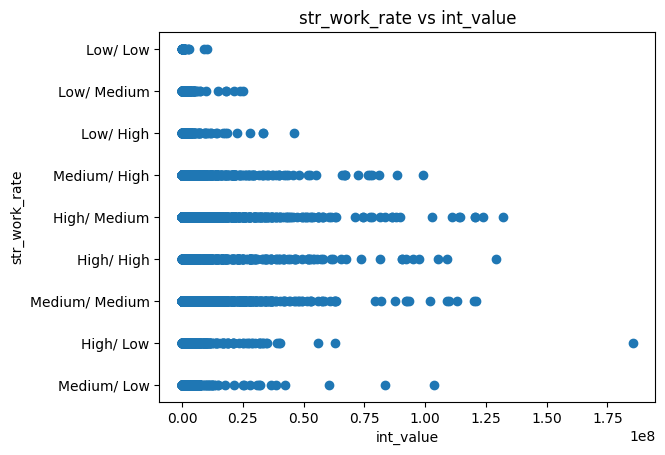

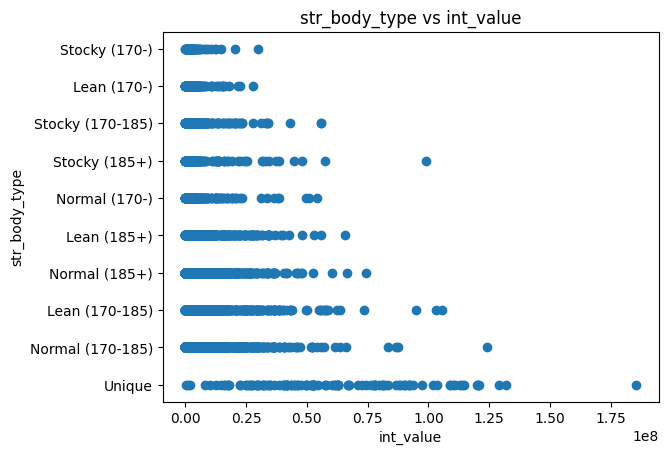

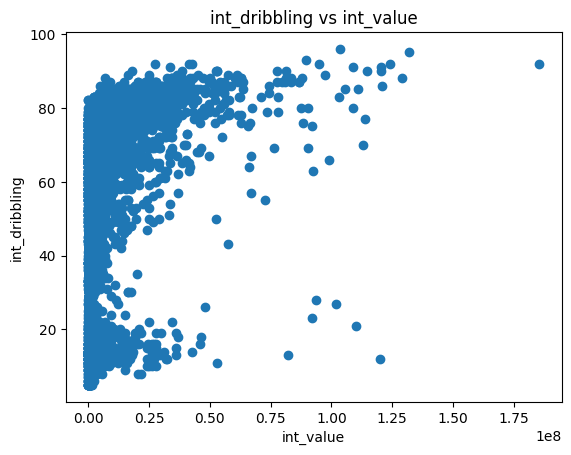

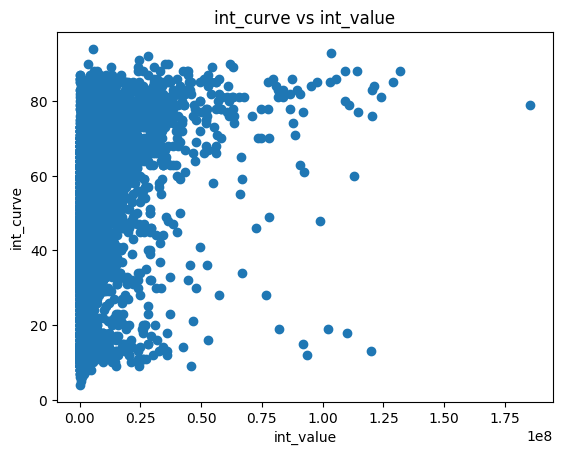

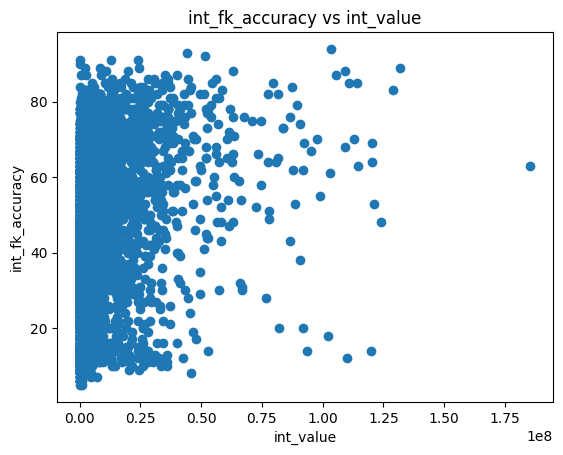

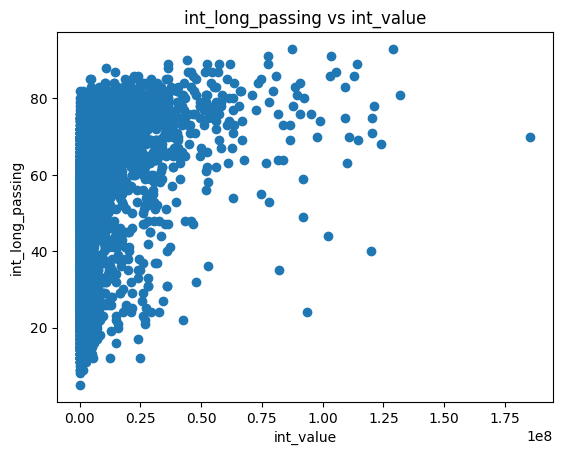

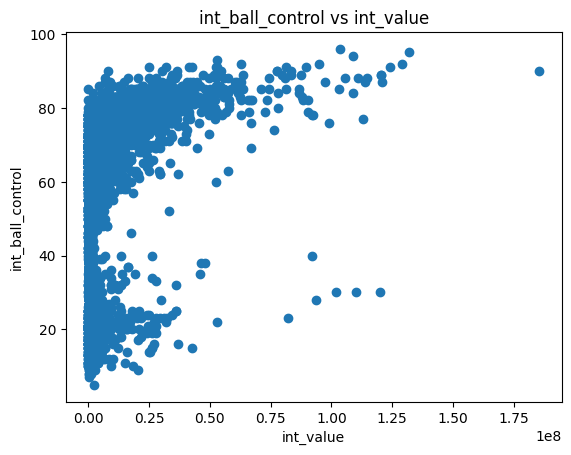

In [ ]:
# select the column to plot against all others
target_column = ['int_overall_rating','int_value']

# iterate over all columns and create scatter plots
for target in target_column:
  for column in df_players.columns:
    if column != target:
        plt.scatter(df[target], df[column])
        plt.xlabel(target)
        plt.ylabel(column)
        plt.title(f"{column} vs {target}")
        plt.show()

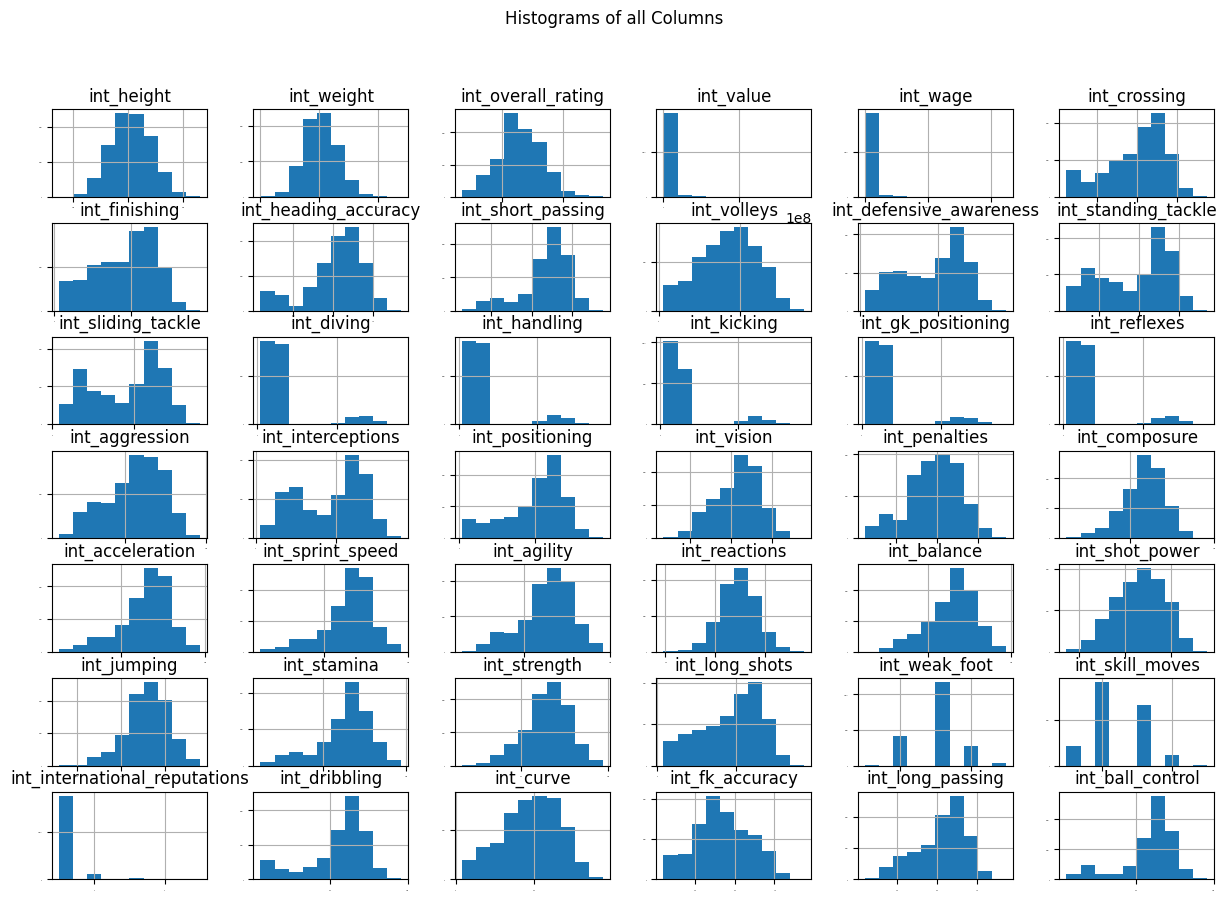

In [ ]:
#Histograms of all columns
df.hist(figsize=(15, 10),xlabelsize=0, ylabelsize=0)

# Add labels and title
plt.suptitle('Histograms of all Columns')
plt.show()

##Checking for Multicollinearity

In [ ]:
# correlation matrix for the modified dataframe

final_df.corr()

int_height  int_weight  int_overall_rating  \
int_height                        1.000000    0.772728            0.033578   
int_weight                        0.772728    1.000000            0.142963   
int_overall_rating                0.033578    0.142963            1.000000   
int_value                         0.004337    0.032207            0.555632   
int_wage                          0.023442    0.061778            0.590335   
...                                    ...         ...                 ...   
str_body_type_Normal (185+)       0.568547    0.518653            0.036085   
str_body_type_Stocky (170-)      -0.141617   -0.068170            0.023723   
str_body_type_Stocky (170-185)   -0.076442    0.057567            0.048943   
str_body_type_Stocky (185+)       0.152570    0.213242            0.036930   
str_body_type_Unique              0.011608    0.023137            0.215546   

                                int_value  int_wage  int_crossing  \
int_height                       0.004337  0.023442     -0.488400   
int_weight                       0.032207  0.061778     -0.399702   
int_overall_rating               0.555632  0.590335      0.407489   
int_value                        1.000000  0.814639      0.228500   
int_wage                         0.814639  1.000000      0.252983   
...                                   ...       ...           ...   
str_body_type_Normal (185+)     -0.033716 -0.017924     -0.387195   
str_body_type_Stocky (170-)     -0.001041 -0.001501      0.048844   
str_body_type_Stocky (170-185)   0.000824  0.004748      0.045926   
str_body_type_Stocky (185+)      0.009589  0.011421     -0.081441   
str_body_type_Unique             0.577829  0.545163      0.075452   

                                int_finishing  int_heading_accuracy  \
int_height                          -0.374418              0.012797   
int_weight                          -0.289110              0.043845   
int_overall_rating                   0.323294              0.324860   
int_value                            0.211812              0.155850   
int_wage                             0.223714              0.198691   
...                                       ...                   ...   
str_body_type_Normal (185+)         -0.300085             -0.056826   
str_body_type_Stocky (170-)          0.037348             -0.009901   
str_body_type_Stocky (170-185)       0.059566              0.050000   
str_body_type_Stocky (185+)         -0.038541              0.050765   
str_body_type_Unique                 0.081924              0.055321   

                                int_short_passing  int_volleys  ...  \
int_height                              -0.351635    -0.344798  ...   
int_weight                              -0.275273    -0.258363  ...   
int_overall_rating                       0.500764     0.371456  ...   
int_value                                0.291509     0.234745  ...   
int_wage                                 0.316714     0.258506  ...   
...                                           ...          ...  ...   
str_body_type_Normal (185+)             -0.286202    -0.279718  ...   
str_body_type_Stocky (170-)              0.035216     0.038062  ...   
str_body_type_Stocky (170-185)           0.043482     0.068743  ...   
str_body_type_Stocky (185+)             -0.046923    -0.033822  ...   
str_body_type_Unique                     0.099159     0.094787  ...   

                                str_body_type_Lean (170-)  \
int_height                                      -0.302610   
int_weight                                      -0.259244   
int_overall_rating                              -0.043604   
int_value                                       -0.022331   
int_wage                                        -0.026653   
...                                                   ...   
str_body_type_Normal (185+)                     -0.082234   
str_body_type_Stocky (170-)                     -0.011539   
str_body_ty

Text(0.5, 1.0, 'Correlation Heatmap')

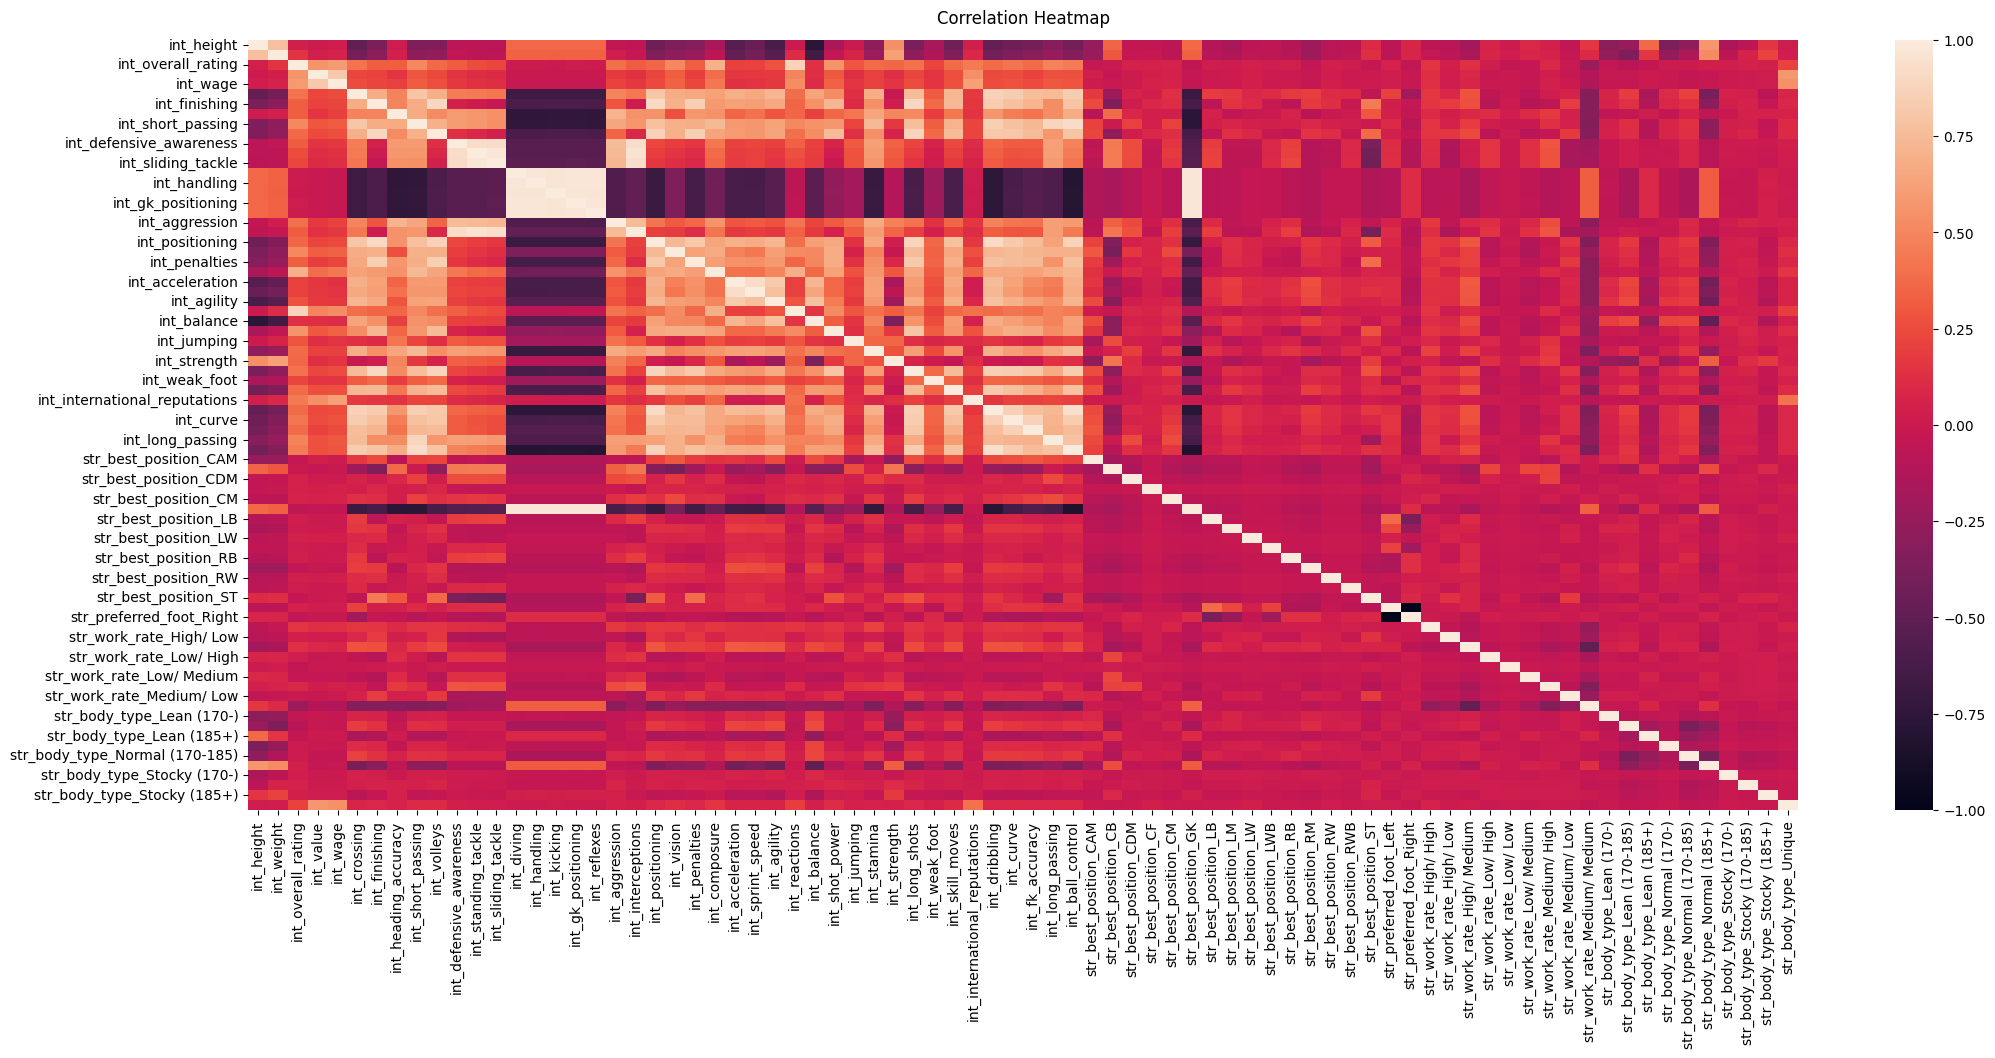

In [ ]:
# Correlation heatmap

plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(final_df.corr(), vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
# checking for features that are highly correlated with target variable

final_df.corr()[['int_overall_rating']].sort_values(by='int_overall_rating', ascending=False)

int_overall_rating
int_overall_rating                      1.000000
int_reactions                           0.867368
int_composure                           0.702441
int_wage                                0.590335
int_shot_power                          0.556646
...                                          ...
str_best_position_RM                   -0.048432
str_preferred_foot_Right               -0.049261
str_best_position_GK                   -0.057645
str_body_type_Lean (170-185)           -0.080069
str_work_rate_Medium/ Medium           -0.221163

[78 rows x 1 columns]

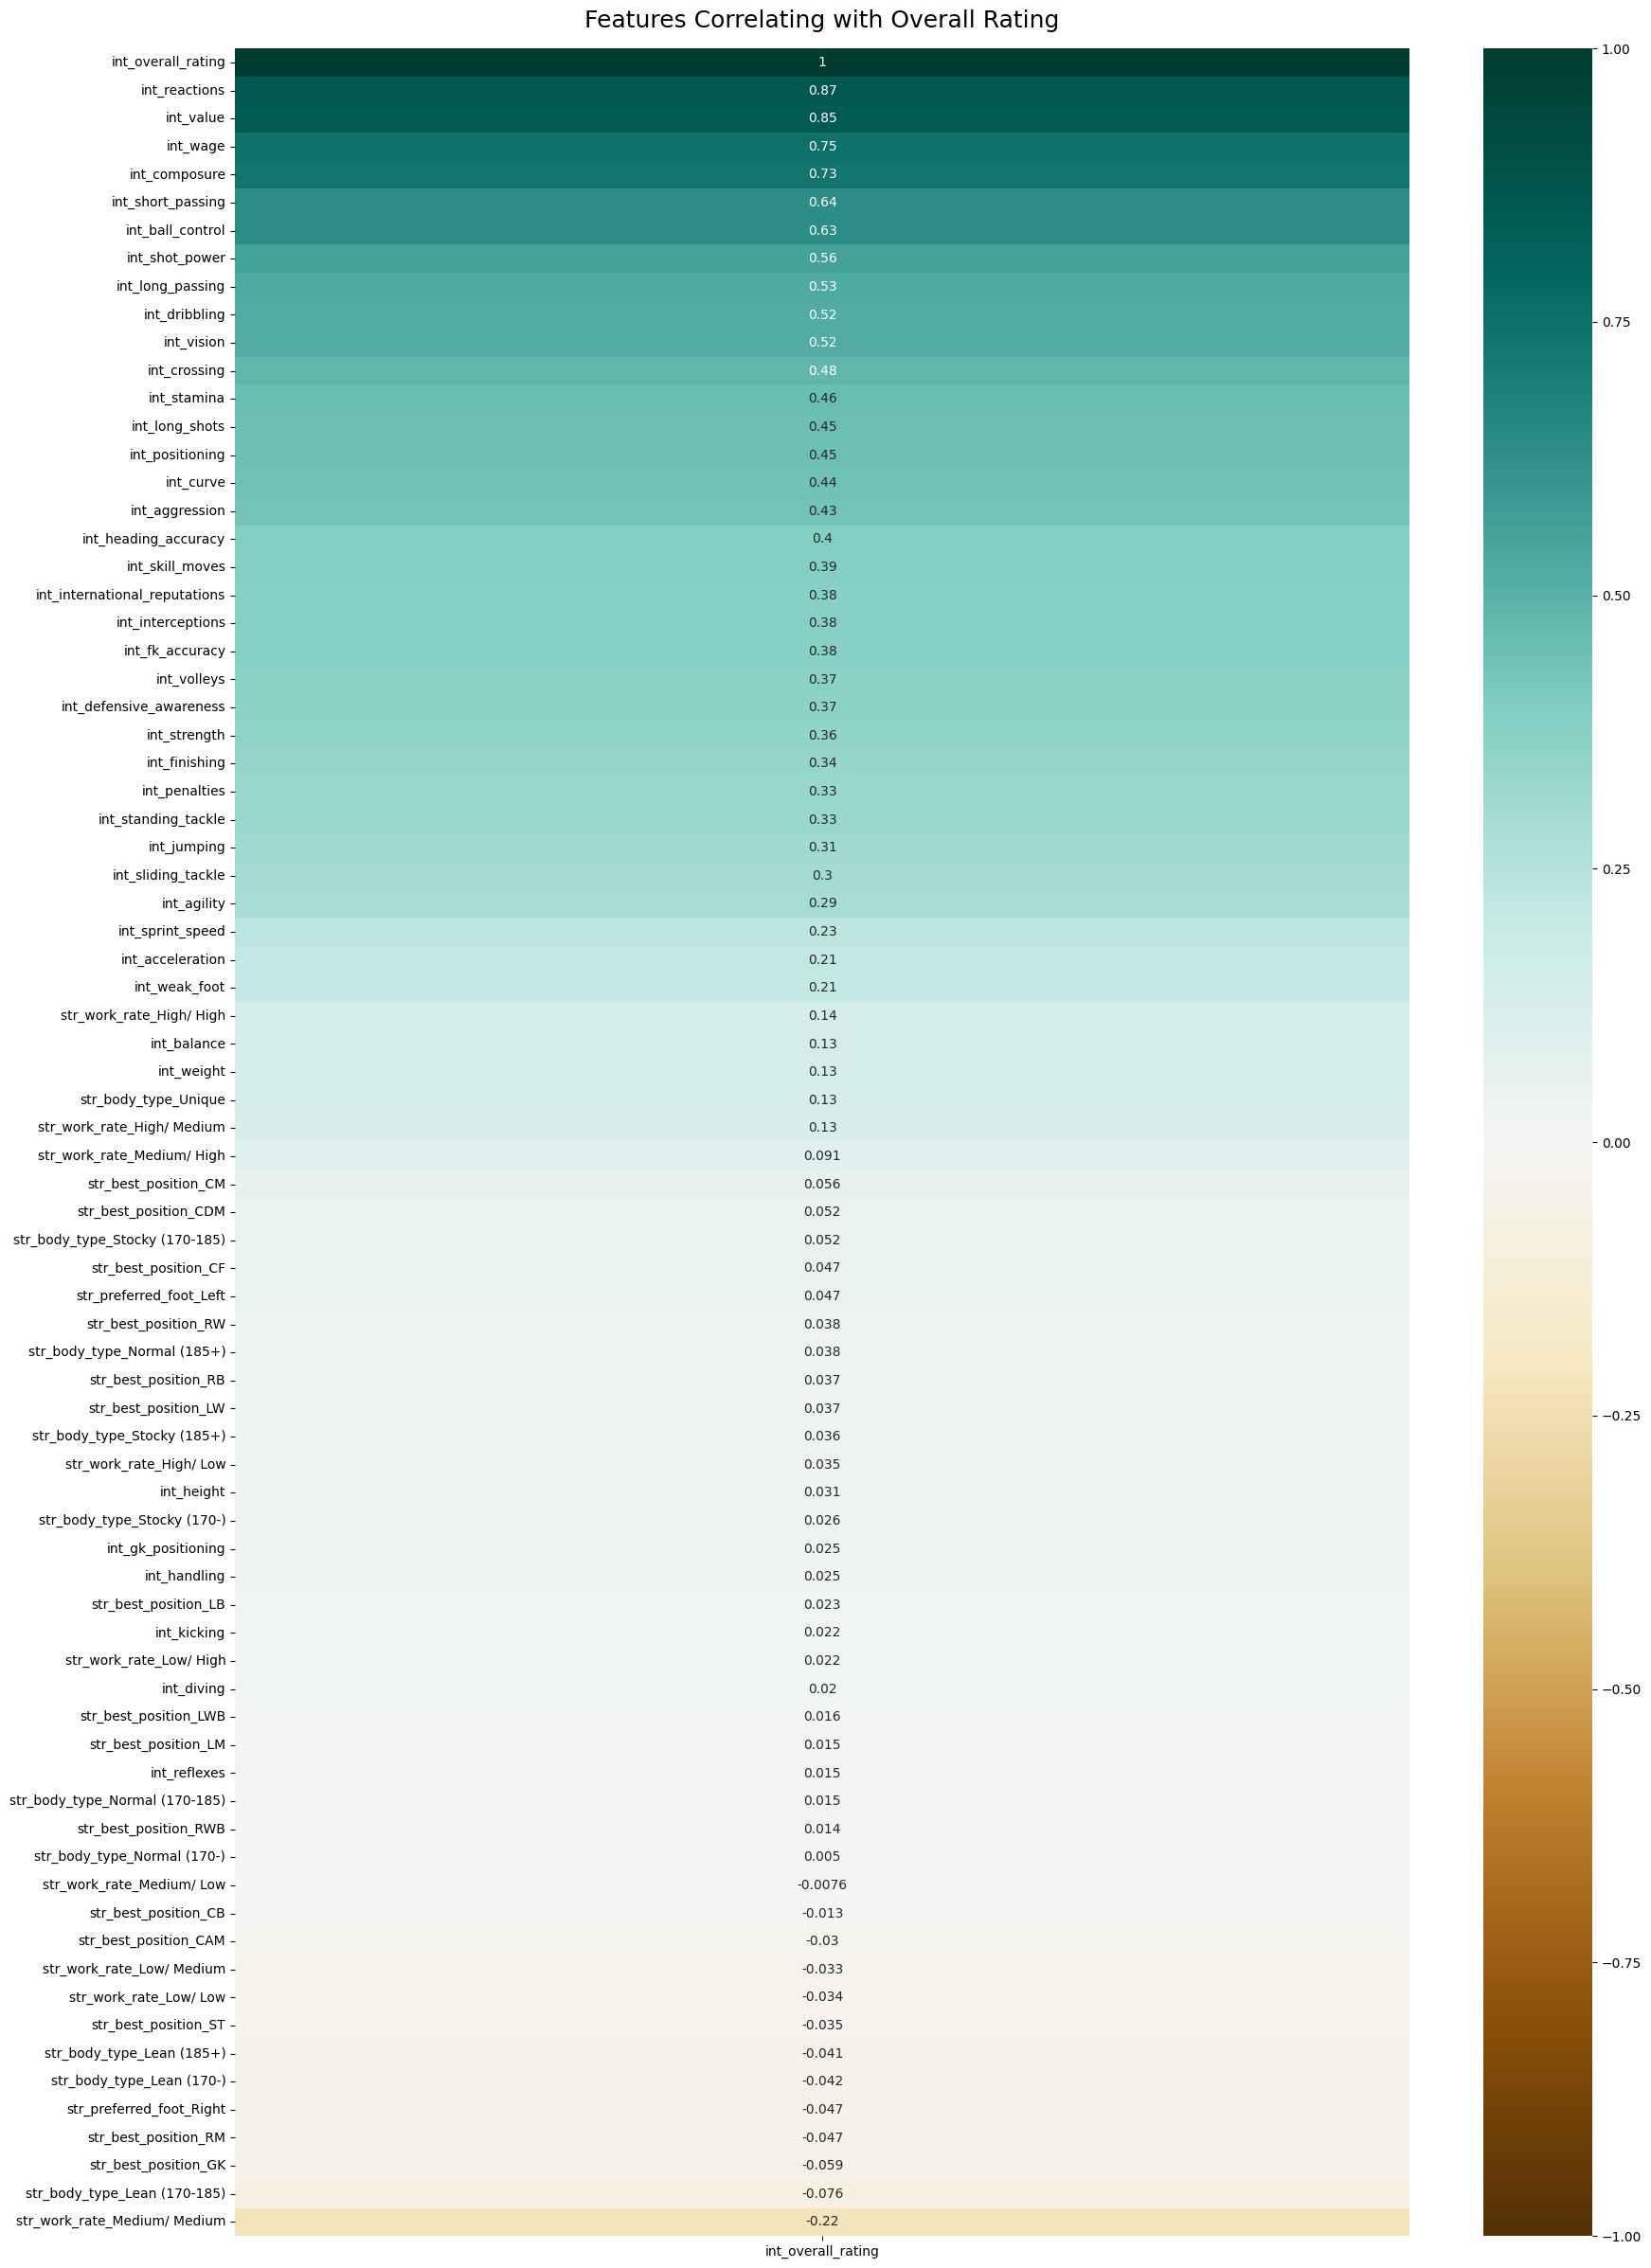

In [ ]:
# correlation(spearman) heatmap of target variable Overall Rating with the features 

plt.figure(figsize=(20, 30))
heatmap = sns.heatmap(final_df.corr('spearman')[['int_overall_rating']].sort_values(by='int_overall_rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Overall Rating', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Check the VIF values for every column 

vif = pd.DataFrame()
vif['Features'] = final_df.columns
vif['VIF'] = [variance_inflation_factor(final_df.values, i) for i in range(final_df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features   VIF
77           str_body_type_Unique   inf
45           str_best_position_CF   inf
59       str_work_rate_High/ High   inf
66      str_work_rate_Medium/ Low   inf
65     str_work_rate_Medium/ High   inf
..                            ...   ...
3                       int_value  3.53
32                   int_strength  3.49
36  int_international_reputations  1.77
30                    int_jumping  1.66
34                  int_weak_foot  1.23

[78 rows x 2 columns]

In [ ]:
# copying the dataframe in a temperory variable

df_final = final_df

# Feature Selection
## 1. Filter Methods
### 1.1 Variance Threshold


In [ ]:
# dividing the dataset into dependent/independent variables, and train and test set

y = final_df["int_overall_rating"]
X = final_df.drop("int_overall_rating", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
# Set variance threshold to 0
selector = VarianceThreshold(threshold = 0)
selector.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
sum(selector.get_support())

77

In [ ]:
X_train.shape

(13301, 77)

#### There are no features that have constant variance

In [ ]:
# Set variance threshold to 0.05
selector = VarianceThreshold(threshold = 0.05)
selector.fit(X_train)

VarianceThreshold(threshold=0.05)

In [ ]:
sum(selector.get_support())

60

In [ ]:
# Looking at the columns below the threshold of 0.05
[x for x in X_train.columns if x not in X_train.columns[selector.get_support()]]

['str_best_position_CF',
 'str_best_position_LM',
 'str_best_position_LW',
 'str_best_position_LWB',
 'str_best_position_RW',
 'str_best_position_RWB',
 'str_work_rate_High/ Low',
 'str_work_rate_Low/ High',
 'str_work_rate_Low/ Low',
 'str_work_rate_Low/ Medium',
 'str_work_rate_Medium/ Low',
 'str_body_type_Lean (170-)',
 'str_body_type_Normal (170-)',
 'str_body_type_Stocky (170-)',
 'str_body_type_Stocky (170-185)',
 'str_body_type_Stocky (185+)',
 'str_body_type_Unique']

In [ ]:
columns_to_keep = X_train.columns[selector.get_support()]

In [ ]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)
print(X_train.shape, X_test.shape)

(13301, 60) (5701, 60)


In [ ]:
type(X_train)

numpy.ndarray

### 1.2 Information Gain



####we are not using the above variance threshold method and we will be using this Information gain hence 

In [ ]:


y = final_df["int_overall_rating"]
X = final_df.drop("int_overall_rating", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
mi = mutual_info_regression(X_train, y_train)

In [ ]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

int_value                1.317234
int_reactions            0.766981
int_wage                 0.628772
int_ball_control         0.509244
int_composure            0.457273
                           ...   
str_best_position_LWB    0.000000
str_best_position_LM     0.000000
str_best_position_LB     0.000000
str_best_position_GK     0.000000
int_height               0.000000
Length: 77, dtype: float64

In [ ]:
len(mi[mi > 0.02])

40

<Axes: >

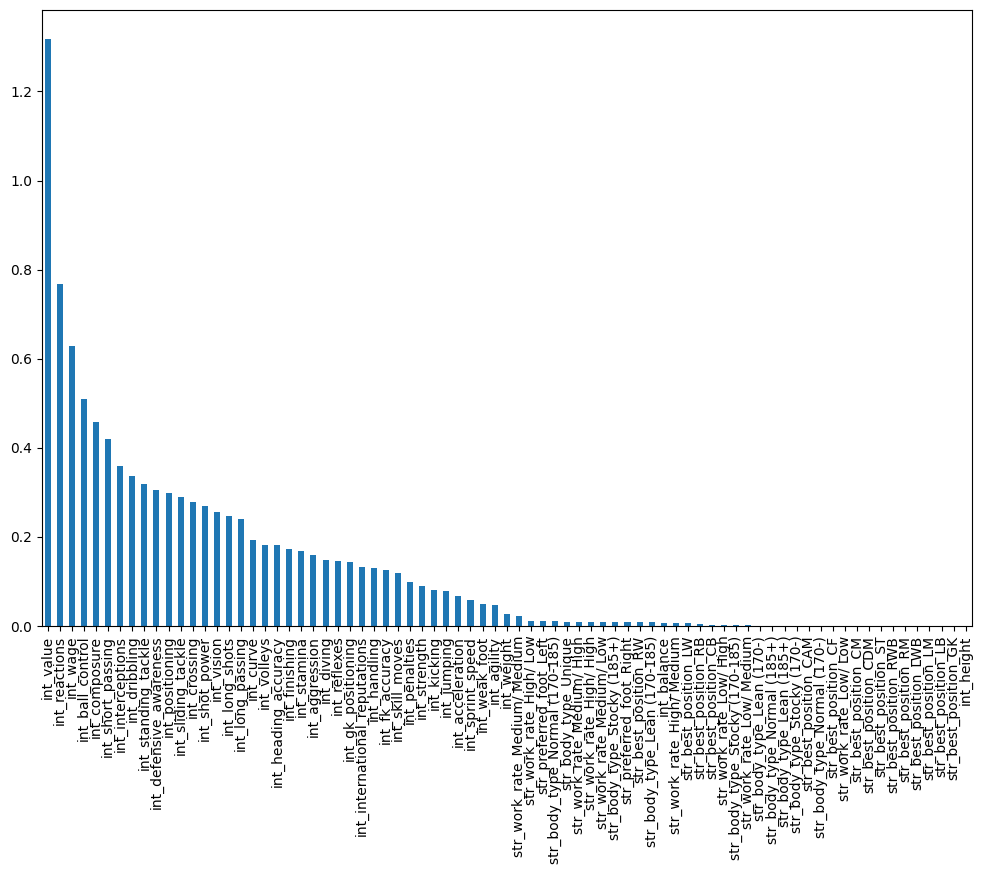

In [ ]:
mi.sort_values(ascending=False).plot.bar(figsize=(12,8))

In [ ]:
# select top 40 features
sel_ = SelectKBest(mutual_info_classif, k=40).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['int_weight', 'int_value', 'int_wage', 'int_crossing', 'int_finishing',
       'int_heading_accuracy', 'int_short_passing', 'int_volleys',
       'int_defensive_awareness', 'int_standing_tackle', 'int_sliding_tackle',
       'int_diving', 'int_handling', 'int_kicking', 'int_gk_positioning',
       'int_reflexes', 'int_aggression', 'int_interceptions',
       'int_positioning', 'int_vision', 'int_penalties', 'int_composure',
       'int_acceleration', 'int_sprint_speed', 'int_agility', 'int_reactions',
       'int_shot_power', 'int_jumping', 'int_stamina', 'int_strength',
       'int_long_shots', 'int_weak_foot', 'int_skill_moves',
       'int_international_reputations', 'int_dribbling', 'int_curve',
       'int_fk_accuracy', 'int_long_passing', 'int_ball_control',
       'str_body_type_Unique'],
      dtype='object')

In [ ]:
columns_to_keep = X_train.columns[sel_.get_support()]

In [ ]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
print(X_train.shape, X_test.shape)

(13301, 40) (5701, 40)


#Feature Extraction - PCA

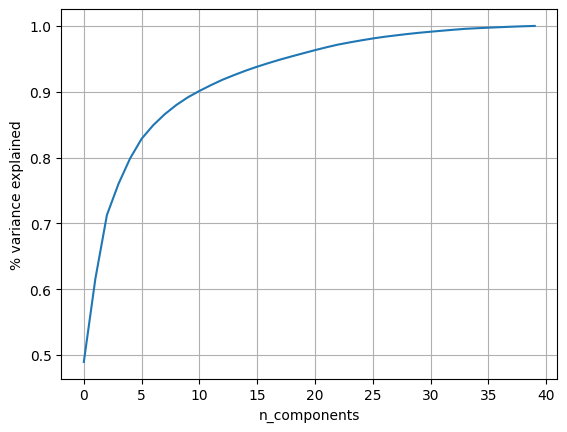

In [ ]:
# applying standard scaler transformation to the train and test datasets

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# plots the cumulative variance explained by increasing the number of principal components 
# to help in selecting the optimal number of components

pca = PCA(n_components = X_train_std.shape[1])
pca_data = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999999999998

In [ ]:
# Taken from above graph n = 35
pca = PCA(n_components = 35)
pca_train_data = pca.fit_transform(X_train_std)
pca_test_data = pca.transform(X_test_std)

In [ ]:
n_features=35

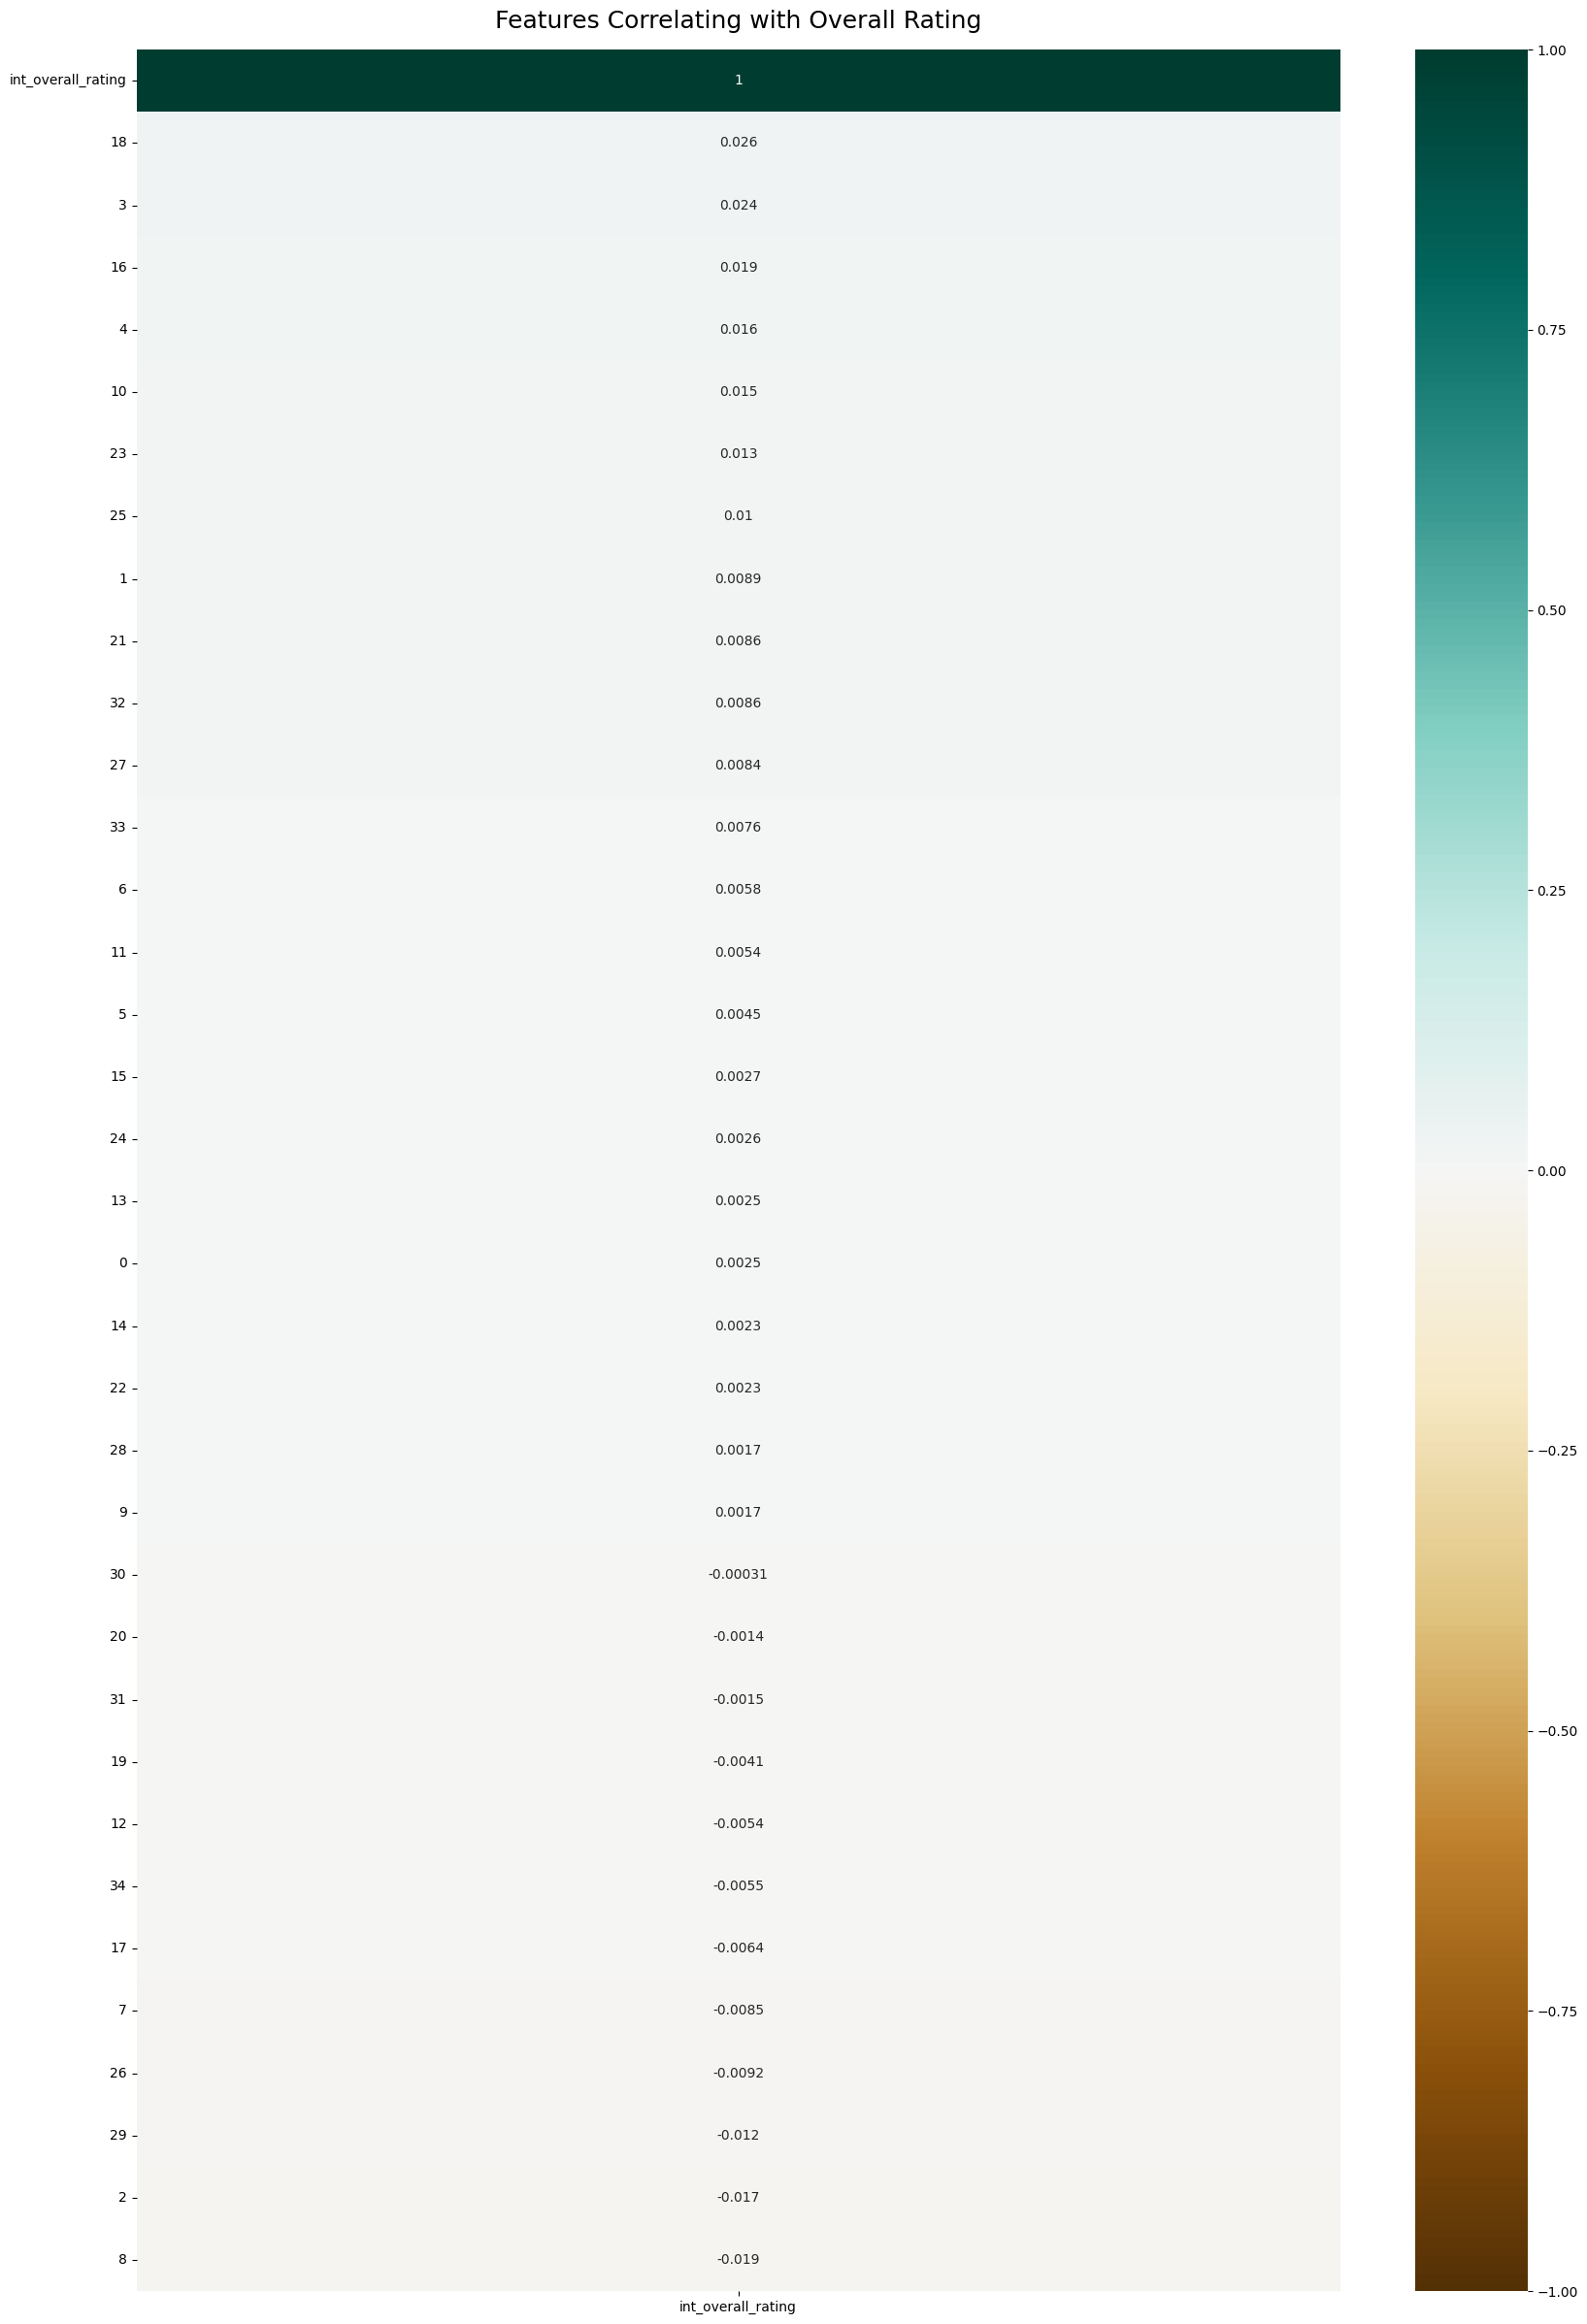

In [ ]:
df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["int_overall_rating"] = y_train

plt.figure(figsize=(20, 30))
heatmap = sns.heatmap(df_train_pca.corr('spearman')[['int_overall_rating']].sort_values(by='int_overall_rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Overall Rating', fontdict={'fontsize':18}, pad=16);

In [ ]:
#checking VIF all the features after PCA
df_train_pca = df_train_pca.drop("int_overall_rating", axis = 1)
vif = pd.DataFrame()
vif['PCA_Features'] = df_train_pca.columns
vif['PCA_VIF'] = [variance_inflation_factor(df_train_pca.values, i) for i in range(df_train_pca.shape[1])]
vif['PCA_VIF'] = round(vif['PCA_VIF'], 2)
vif = vif.sort_values(by = "PCA_VIF")
vif

PCA_Features  PCA_VIF
0             0      1.0
19           19      1.0
20           20      1.0
21           21      1.0
22           22      1.0
23           23      1.0
24           24      1.0
18           18      1.0
25           25      1.0
27           27      1.0
28           28      1.0
29           29      1.0
30           30      1.0
31           31      1.0
32           32      1.0
26           26      1.0
33           33      1.0
17           17      1.0
15           15      1.0
1             1      1.0
2             2      1.0
3             3      1.0
4             4      1.0
5             5      1.0
6             6      1.0
16           16      1.0
7             7      1.0
9             9      1.0
10           10      1.0
11           11      1.0
12           12      1.0
13           13      1.0
14           14      1.0
8             8      1.0
34           34      1.0

In [ ]:
df_train_pca.shape

(13301, 35)

#Modeling for overall rating as target variable

In [ ]:
def adjusted_r2_score(y_true, y_predict, n_features):
    r2 = r2_score(y_true, y_predict)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return adj_r2

#xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# create a XGBRegressor object
xgb_regr = xgb.XGBRegressor()

# define the hyperparameter space
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# create a GridSearchCV object
grid_search = GridSearchCV(xgb_regr, params, cv=3)

# fit the GridSearchCV object to the training data
grid_search.fit(df_train_pca, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

# make predictions on the test data
y_pred = grid_search.predict(pca_test_data)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
adjusted_r2 = adjusted_r2_score(y_test, y_pred,n_features )

print("R-squared score:", r2)
print("Adjusted R-squared score:", adjusted_r2)
print("Root Mean squared error:", rmse)


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
R-squared score: 0.9676257879235282
Adjusted R-squared score: 0.9674257707262331
Root Mean squared error: 1.2391655673306106


#Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# create a DecisionTreeRegressor object
dt_regr = DecisionTreeRegressor()

# define the hyperparameter space
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# create a GridSearchCV object
grid_search = GridSearchCV(dt_regr, params, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(df_train_pca, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

# make predictions on the test data
y_pred = grid_search.predict(pca_test_data)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_squared_error

adjusted_r2 = adjusted_r2_score(y_test, y_pred,n_features )
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Adjusted R-squared score:", adjusted_r2)
print("Root Mean squared error:", rmse)


{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5}
Adjusted R-squared score: 0.8660922420771318
Root Mean squared error: 2.512436719473291


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# create a LinearRegression object
lr_regr = LinearRegression()

# define the hyperparameter space
params = {
    'fit_intercept': [True, False]
}

# create a GridSearchCV object
grid_search = GridSearchCV(lr_regr, params, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(df_train_pca, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

# make predictions on the test data
y_pred = grid_search.predict(pca_test_data)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_squared_error

adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_features)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Adjusted R-squared score:", adjusted_r2)
print("Root Mean squared error:", rmse)


{'fit_intercept': True}
Adjusted R-squared score: 0.8868118676363652
Root Mean squared error: 2.3098975050366057


#AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# create an AdaBoostRegressor object
ada_regr = AdaBoostRegressor()

# define the hyperparameter space
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

# create a GridSearchCV object
grid_search = GridSearchCV(ada_regr, params, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(df_train_pca, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

# make predictions on the test data
y_pred = grid_search.predict(pca_test_data)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_squared_error

adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_features)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Adjusted R-squared score:", adjusted_r2)
print("Root Mean squared error:", rmse)


{'learning_rate': 0.1, 'n_estimators': 300}
Adjusted R-squared score: 0.8554340682715074
Root Mean squared error: 2.6105092869562934


#### For Transfer value, i.e Regression Task 2 check other notebook submission